### Introduction:


In this Global Life Expectancy data, where different countries are listed according to their development status, and showing what fatcors are there to affect life expectancy of that country from 2000 to 2015, and to find if those factors really affecting life expectency positively or negatively in the growth of life expectancy. 
First, I have to look into data to find if the data is all clean to process further analyses or not?
Then I will use the technique to fill the missing values, and find  feature that is affecting life expectancy.


#### Lets Start From libraries that I will use for this data:

### Libraries used:

In [389]:
import pandas as pd #for dataframe
import numpy as np #linear algebra libraries
import matplotlib.pyplot as plt #visualization
import seaborn as sns # seaborn for visualization
import math #statistics
import scipy.stats as stats #for ttest
from sklearn.preprocessing import StandardScaler # for standardization and normalization
from sklearn.decomposition import PCA #to reduce Linear dimensionality
from sklearn.preprocessing import normalize #for normalization
from sklearn.preprocessing import scale #for standardization
from sqlalchemy import create_engine # for open connection of SQL and python
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

### Accessing Thinkful Database:

In [390]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_expectancy = pd.read_sql_query('select * from lifeexpectancy',con=engine) #pandas query string

engine.dispose() #close the connection

### Making copy of original data:

In [391]:
#lets make a copy
life_expectancy_c=life_expectancy.copy()

In [392]:
life_expectancy_c

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


After quick checking the data, we do few missing values, but need more eploration.

#### EDA: 

In [393]:
#Lets, see some information of data
life_expectancy_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

There is 2938 rows and 22 columns. Dtypes looks okay as Country and Status is object, and others are floats and integers. Life expectancy, Adult Mortality, Alcohol, Hepatitis, BMT, Polio, Total expenditure, Diptheria, GDP, Population, thinness 1-19 and thinness 5-9, Income composition, and schooling are missing some values.

### Description:

In [394]:
##to generate descriptive statistics that summarize the central tendency, 
#dispersion and shape of a dataset’s distribution, excluding NaN values.
life_expectancy_c.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


From description of data, We can see that:

Adult Mortality, infant deaths, percentage expenditure, Measles, under-five deaths, GDP, have really high standard deviation and max is way high. 

GDP and percentage expenditure might make some sense because there is some developed countries which got really high number in GDP and Percentage of expenditure. 

Population data looks so weird, need to be checked. 

Percentage expenditure has 0 min, which doesn't make any sense and might be missing values.

### Cleaning:

Lets, fix those 0's in percentage expenditure by replacing it to missing values.

In [395]:
life_expectancy_c['percentage expenditure'].replace(0, np.nan, inplace=True)

lets see if it makes any changes or not?

In [396]:
life_expectancy_c[life_expectancy_c['percentage expenditure']== 0]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


So from that we can see that, there is no more 0's in percentage expenditure.

Lets start looking from columns, if column name need to be fixed, just to make work easier.

In [397]:
#Checking for column data if needed cleanning
life_expectancy_c.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

We can see some of the columns have white space in the beggining and end of the string, so I will fix it.

In [398]:
#cleaning all white space in columns name
life_expectancy_c.columns = life_expectancy_c.columns.str.strip() #deleting white space on both side of string

In [399]:
#checking if it looks okay or not after removing white space
life_expectancy_c.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

We can see all the columns title has no white space, but still we can see thinness 1-19 years doeas have some space in between, which is okay.

Lets move to other missing values in the data.

### Missing values:

In [400]:
#Lets, see the sum of missing values in the table for each columns.
life_expectancy_c.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure             611
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

We can see lots of missing values, high of 652 in population to low of 10 in Life expectancy and Adult mortality.


As there is only 10 missing values in life expectancy and adult mortality, lets remove all the missing values from those columns.

### Dropping lower number of values:

In [401]:
#dropping lower number of missing values in life expectancy and adult mortality.

life_expectancy_c.dropna(subset=['Life expectancy'], inplace=True)
life_expectancy_c.dropna(subset=['Adult Mortality'], inplace=True)


After dropping two lowest features missing values, lets fill in all the missing values for other features.


### Fillin missing values after groupby country: 

In [402]:
#grouping all the features by country
grouped_country = life_expectancy_c.groupby('Country', as_index = False)


In [403]:
#filling all missing values with their mean grouping by country
life_expectancy_c = grouped_country.apply(lambda x: x.fillna(x.mean()))

In [404]:
life_expectancy_c.head()

Country  Year      Status  Life expectancy  Adult Mortality  \
0 0  Afghanistan  2015  Developing             65.0            263.0   
  1  Afghanistan  2014  Developing             59.9            271.0   
  2  Afghanistan  2013  Developing             59.9            268.0   
  3  Afghanistan  2012  Developing             59.5            272.0   
  4  Afghanistan  2011  Developing             59.2            275.0   

     infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  \
0 0             62     0.01               71.279624         65.0     1154   
  1             64     0.01               73.523582         62.0      492   
  2             66     0.01               73.219243         64.0      430   
  3             69     0.01               78.184215         67.0     2787   
  4             71     0.01                7.097109         68.0     3013   

     ...  Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  \
0 0  ...    6.0               8.16        65.0       0.1  584.259210   
  1  ...   58.0               8.18        62.0       0.1  612.696514   
  2  ...   62.0               8.13        64.0       0.1  631.744976   
  3  ...   67.0               8.52        67.0       0.1  669.959000   
  4  ...   68.0               7.87        68.0       0.1   63.537231   

     Population  thinness  1-19 years  thinness 5-9 years  \
0 0  33736494.0                  17.2                17.3   
  1    327582.0                  17.5                17.5   
  2  31731688.0                  17.7                17.7   
  3   3696958.0                  17.9                18.0   
  4   2978599.0                  18.2                18.2   

     Income composition of resources  Schooling  
0 0                            0.479       10.1  
  1                            0.476       10.0  
  2                            0.470        9.9  
  3                            0.463        9.8  
  4                            0.454        9.5  

[5 rows x 22 columns]

In [405]:
#checking for remaining missing values
life_expectancy_c.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                             16
percentage expenditure             416
Hepatitis B                        144
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
HIV/AIDS                             0
GDP                                400
Population                         640
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

After transforming and filling na, I still can see some missing values, which I think make sense, because there is some countries, which are missing all the number value in any years from 2000 to 2015 and is hard to fillin that missing values.

I do not want drop remaining missing values, becasue I don't want  to miss some interesting fact of that country, which might affect life expectancy.

**Now, Lets move to find the outliers**, as  outliers might be okay on this data because the data was taken from really developed to developing to underdeveloped countries and expenditure value is highly different in different countrie as money value is different.

### Outliers:

Lets see through the bar graph if there is lots of outliers or not?

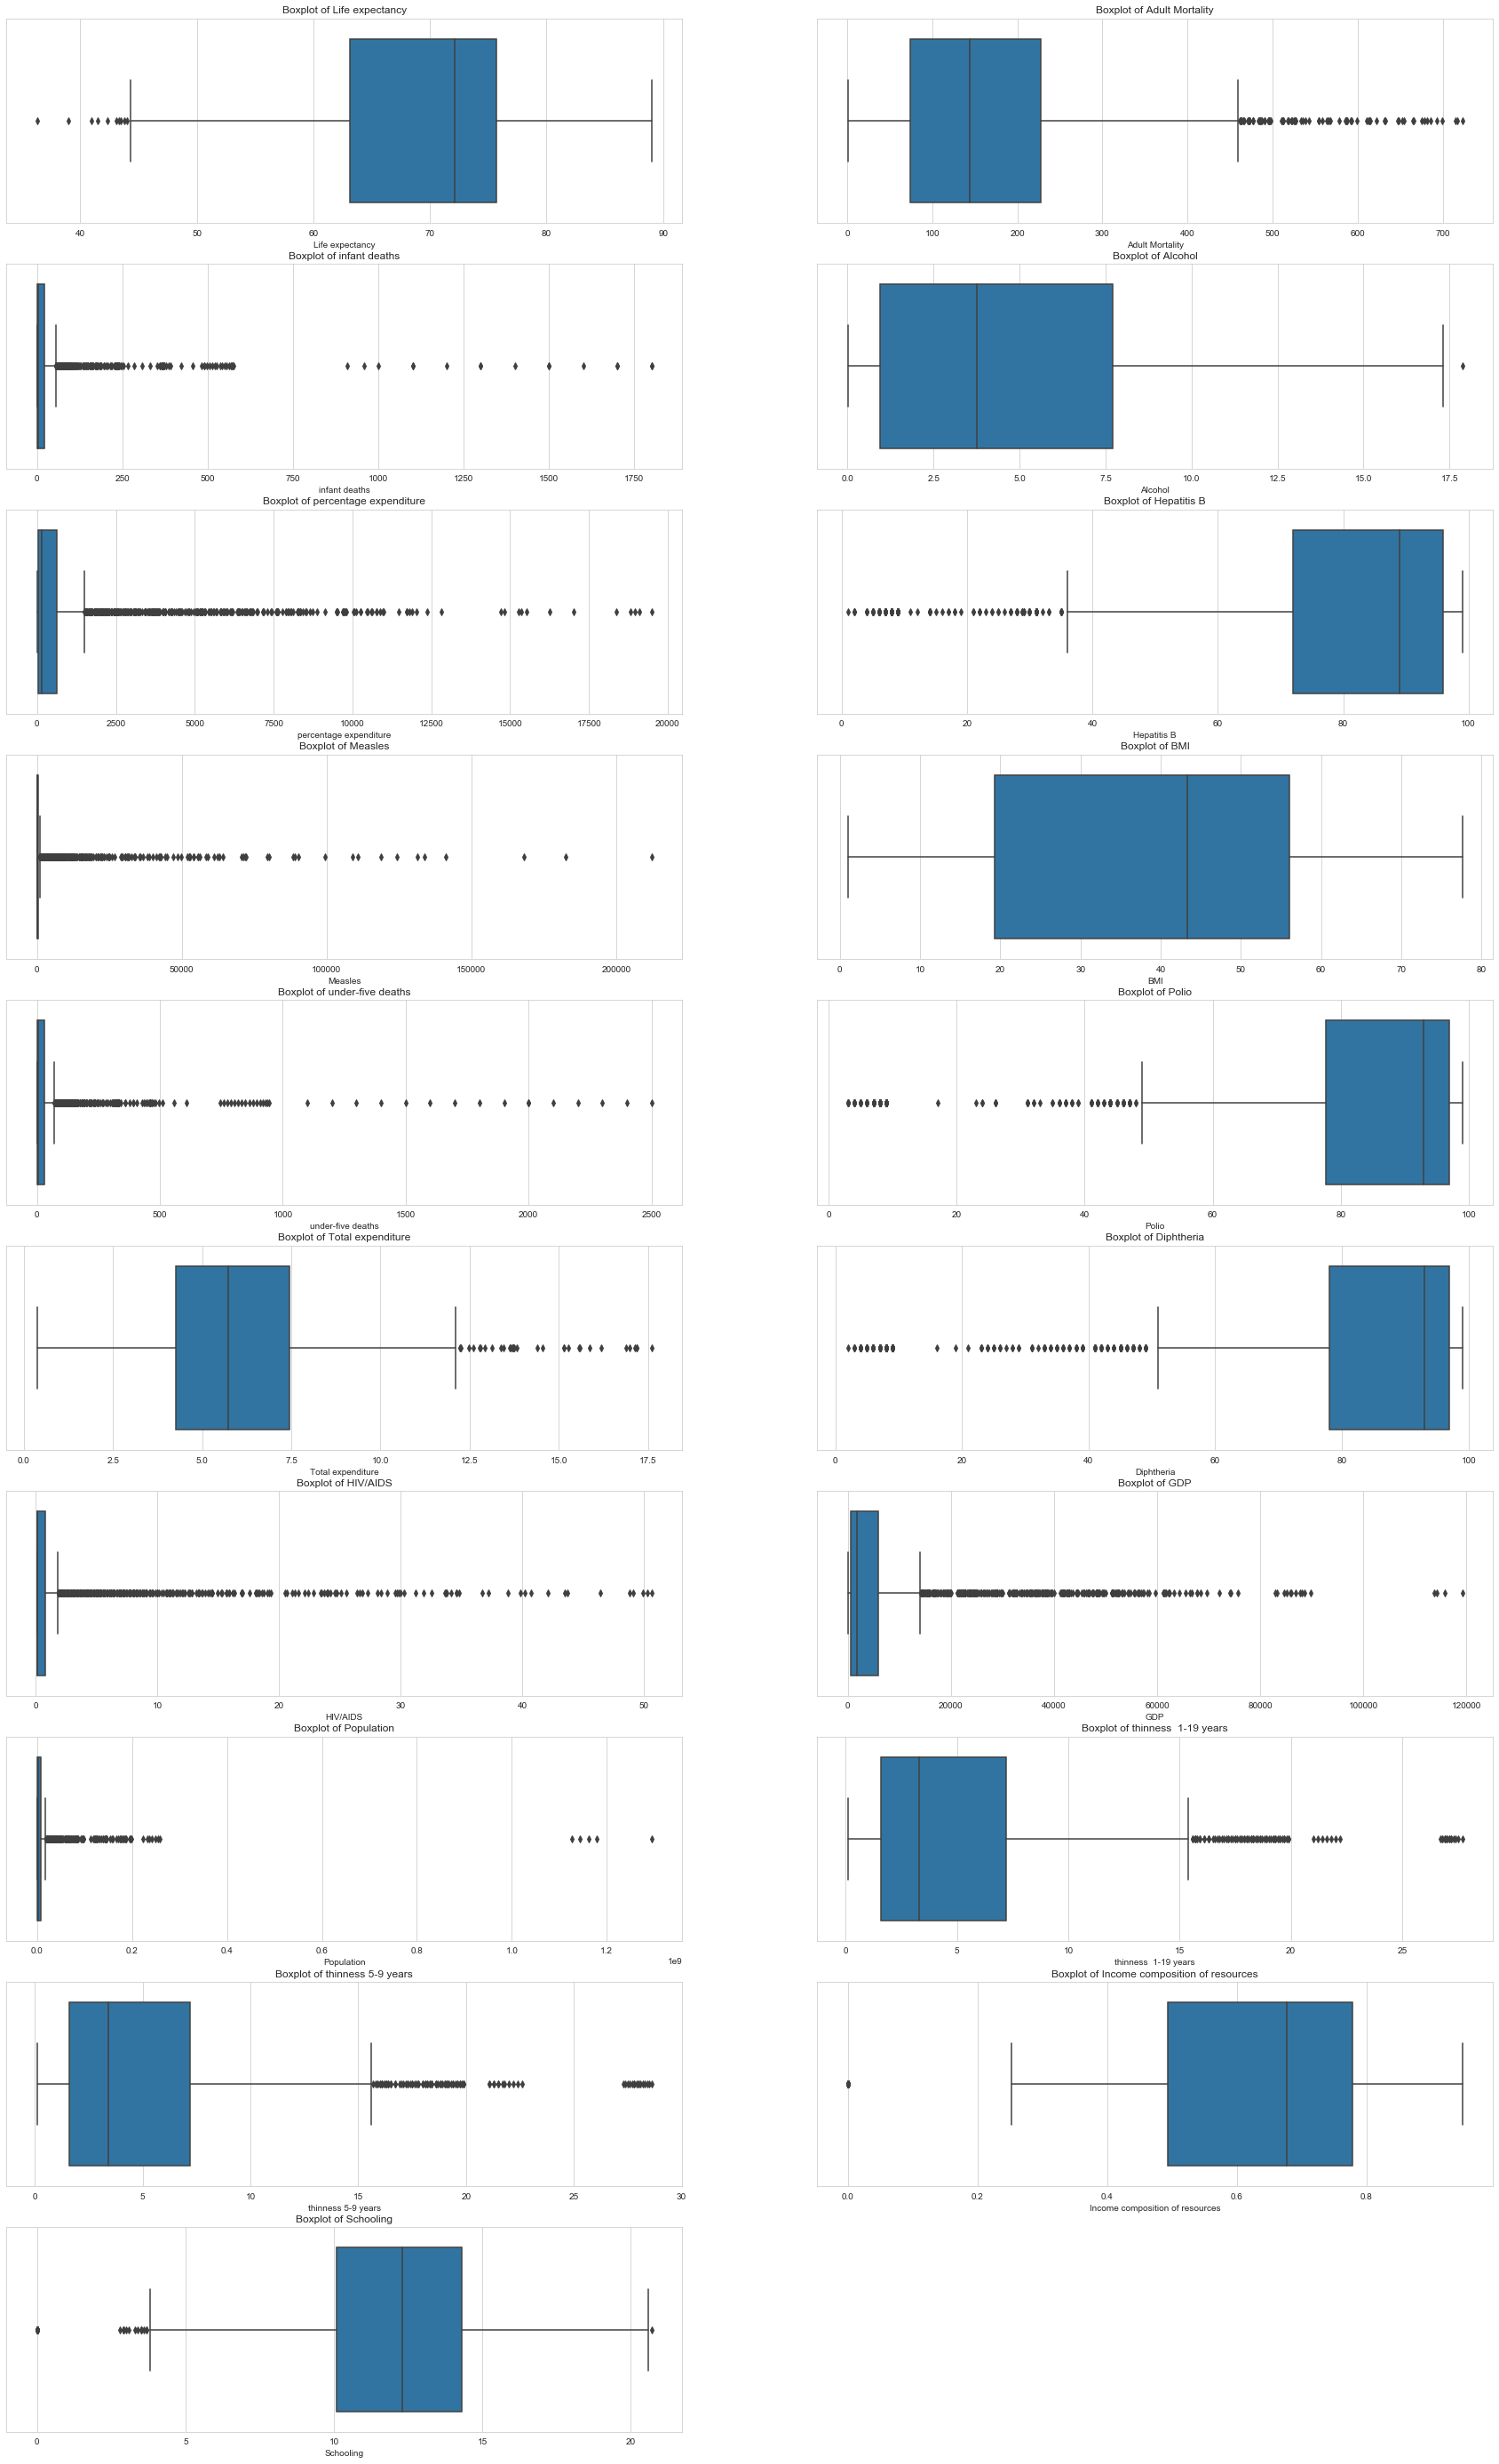

In [406]:

plt.figure(figsize=(30,50))

plt.subplot(10,2,1)
sns.boxplot(life_expectancy_c["Life expectancy"])
plt.title("Boxplot of Life expectancy")

plt.subplot(10,2,2)
sns.boxplot(life_expectancy_c["Adult Mortality"])
plt.title("Boxplot of Adult Mortality")

plt.subplot(10,2,3)
sns.boxplot(life_expectancy_c["infant deaths"])
plt.title("Boxplot of infant deaths")

plt.subplot(10,2,4)
sns.boxplot(life_expectancy_c["Alcohol"])
plt.title("Boxplot of Alcohol")

plt.subplot(10,2,5)
sns.boxplot(life_expectancy_c["percentage expenditure"])
plt.title("Boxplot of percentage expenditure")

plt.subplot(10,2,6)
sns.boxplot(life_expectancy_c["Hepatitis B"])
plt.title("Boxplot of Hepatitis B")

plt.subplot(10,2,7)
sns.boxplot(life_expectancy_c["Measles"])
plt.title("Boxplot of Measles")

plt.subplot(10,2,8)
sns.boxplot(life_expectancy_c["BMI"])
plt.title("Boxplot of BMI")

plt.subplot(10,2,9)
sns.boxplot(life_expectancy_c["under-five deaths"])
plt.title("Boxplot of under-five deaths")

plt.subplot(10,2,10)
sns.boxplot(life_expectancy_c["Polio"])
plt.title("Boxplot of Polio")

plt.subplot(10,2,11)
sns.boxplot(life_expectancy_c["Total expenditure"])
plt.title("Boxplot of Total expenditure")

plt.subplot(10,2,12)
sns.boxplot(life_expectancy_c["Diphtheria"])
plt.title("Boxplot of Diphtheria")

plt.subplot(10,2,13)
sns.boxplot(life_expectancy_c["HIV/AIDS"])
plt.title("Boxplot of HIV/AIDS")

plt.subplot(10,2,14)
sns.boxplot(life_expectancy_c["GDP"])
plt.title("Boxplot of GDP")

plt.subplot(10,2,15)
sns.boxplot(life_expectancy_c["Population"])
plt.title("Boxplot of Population")

plt.subplot(10,2,16)
sns.boxplot(life_expectancy_c["thinness  1-19 years"])
plt.title("Boxplot of thinness  1-19 years")

plt.subplot(10,2,17)
sns.boxplot(life_expectancy_c["thinness 5-9 years"])
plt.title("Boxplot of thinness 5-9 years")

plt.subplot(10,2,18)
sns.boxplot(life_expectancy_c["Income composition of resources"])
plt.title("Boxplot of Income composition of resources")

plt.subplot(10,2,19)
sns.boxplot(life_expectancy_c["Schooling"])
plt.title("Boxplot of Schooling")


plt.show()


From boxplot, we can see there is lots of outliers,

-Actually the data are from all around the world, and there is some coutries which are really under-developed or called developing and some are highly-developed/developed. I think all the outliers in the data does make sense because of there accessibility to the needs in proper time.

But, just for further study I want to use NumPy's percentile() method to see in total numbers of outliers, and will limit the outliers and see the differences.



Now, I use **Tukey's Method** to find the numbers of outliers:This method is also known as the Interquartile Range (IQR) method.

In [407]:
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
Q1 = life_expectancy_c.quantile(0.25)
Q3 = life_expectancy_c.quantile(0.75)

iqr = Q3 - Q1

for threshold in np.arange(1,5,0.5):
    min_val = Q1 - (iqr*threshold)
    max_val = Q3 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((life_expectancy_c > max_val) 
                      | (life_expectancy_c < min_val))[0]))))

The score threshold is: 1.0
Number of outliers is: 5440
The score threshold is: 1.5
Number of outliers is: 4125
The score threshold is: 2.0
Number of outliers is: 3226
The score threshold is: 2.5
Number of outliers is: 2760
The score threshold is: 3.0
Number of outliers is: 2322
The score threshold is: 3.5
Number of outliers is: 2132
The score threshold is: 4.0
Number of outliers is: 1641
The score threshold is: 4.5
Number of outliers is: 1531


Here, we can see there is higher number of outliers. 

#### Now lets try to limit the outliers:

### Winsorization:
One way of limiting the outlier values, 

We can cap the values of the outliers by assigning them new values to see its correlation later.

In [408]:
#winsorization
from scipy.stats.mstats import winsorize

life_expectancy_c["winsorized_Life"] = winsorized_views = winsorize(life_expectancy_c["Life expectancy"], (0.05, 0.05))
life_expectancy_c["winsorized_Adult"] = winsorized_views = winsorize(life_expectancy_c["Adult Mortality"], (0.05, 0.05))
life_expectancy_c["winsorized_infant"] = winsorized_views = winsorize(life_expectancy_c["infant deaths"], (0.05, 0.05))
life_expectancy_c["winsorized_Alcohol"] = winsorized_views = winsorize(life_expectancy_c["Alcohol"], (0.05, 0.05))
life_expectancy_c["winsorized_perexp"] = winsorized_views = winsorize(life_expectancy_c["percentage expenditure"], (0.05, 0.05))
life_expectancy_c["winsorized_Hep"] = winsorized_views = winsorize(life_expectancy_c["Hepatitis B"], (0.05, 0.05))
life_expectancy_c["winsorized_Measles"] = winsorized_views = winsorize(life_expectancy_c["Measles"], (0.05, 0.05))
life_expectancy_c["winsorized_BMI"]=winsorized_views = winsorize(life_expectancy_c["BMI"], (0.05, 0.05))
life_expectancy_c["winsorized_under-five"]=winsorized_views = winsorize(life_expectancy_c["under-five deaths"], (0.05, 0.05))
life_expectancy_c["winsorized_Polio"]=winsorized_views= winsorize(life_expectancy_c["Polio"], (0.05, 0.05))
life_expectancy_c["winsorized_Totexp"]=winsorized_views= winsorize(life_expectancy_c["Total expenditure"], (0.05, 0.05))
life_expectancy_c["winsorized_Diphtheria"]=winsorized_views = winsorize(life_expectancy_c["Diphtheria"], (0.05, 0.05))
life_expectancy_c["winsorized_HIV/AIDS"]=winsorized_views = winsorize(life_expectancy_c["HIV/AIDS"], (0.05, 0.05))
life_expectancy_c["winsorized_GDP"]=winsorized_views = winsorize(life_expectancy_c["GDP"], (0.05, 0.05))
life_expectancy_c["winsorized_Pop"]=winsorized_views = winsorize(life_expectancy_c["Population"], (0.05, 0.05))
life_expectancy_c["winsorized_thin1"]=winsorized_views = winsorize(life_expectancy_c["thinness  1-19 years"], (0.05, 0.05))
life_expectancy_c["winsorized_thin5"]=winsorized_views = winsorize(life_expectancy_c["thinness 5-9 years"], (0.05, 0.05))
life_expectancy_c["winsorized_Inc"]=winsorized_views = winsorize(life_expectancy_c["Income composition of resources"], (0.05, 0.05))
life_expectancy_c["winsorized_Sch"]=winsorized_views = winsorize(life_expectancy_c["Schooling"], (0.05, 0.05))



After winsorizing the data, lets plot the winsorized data in boxplot to see, if it really limit the outliers or not?

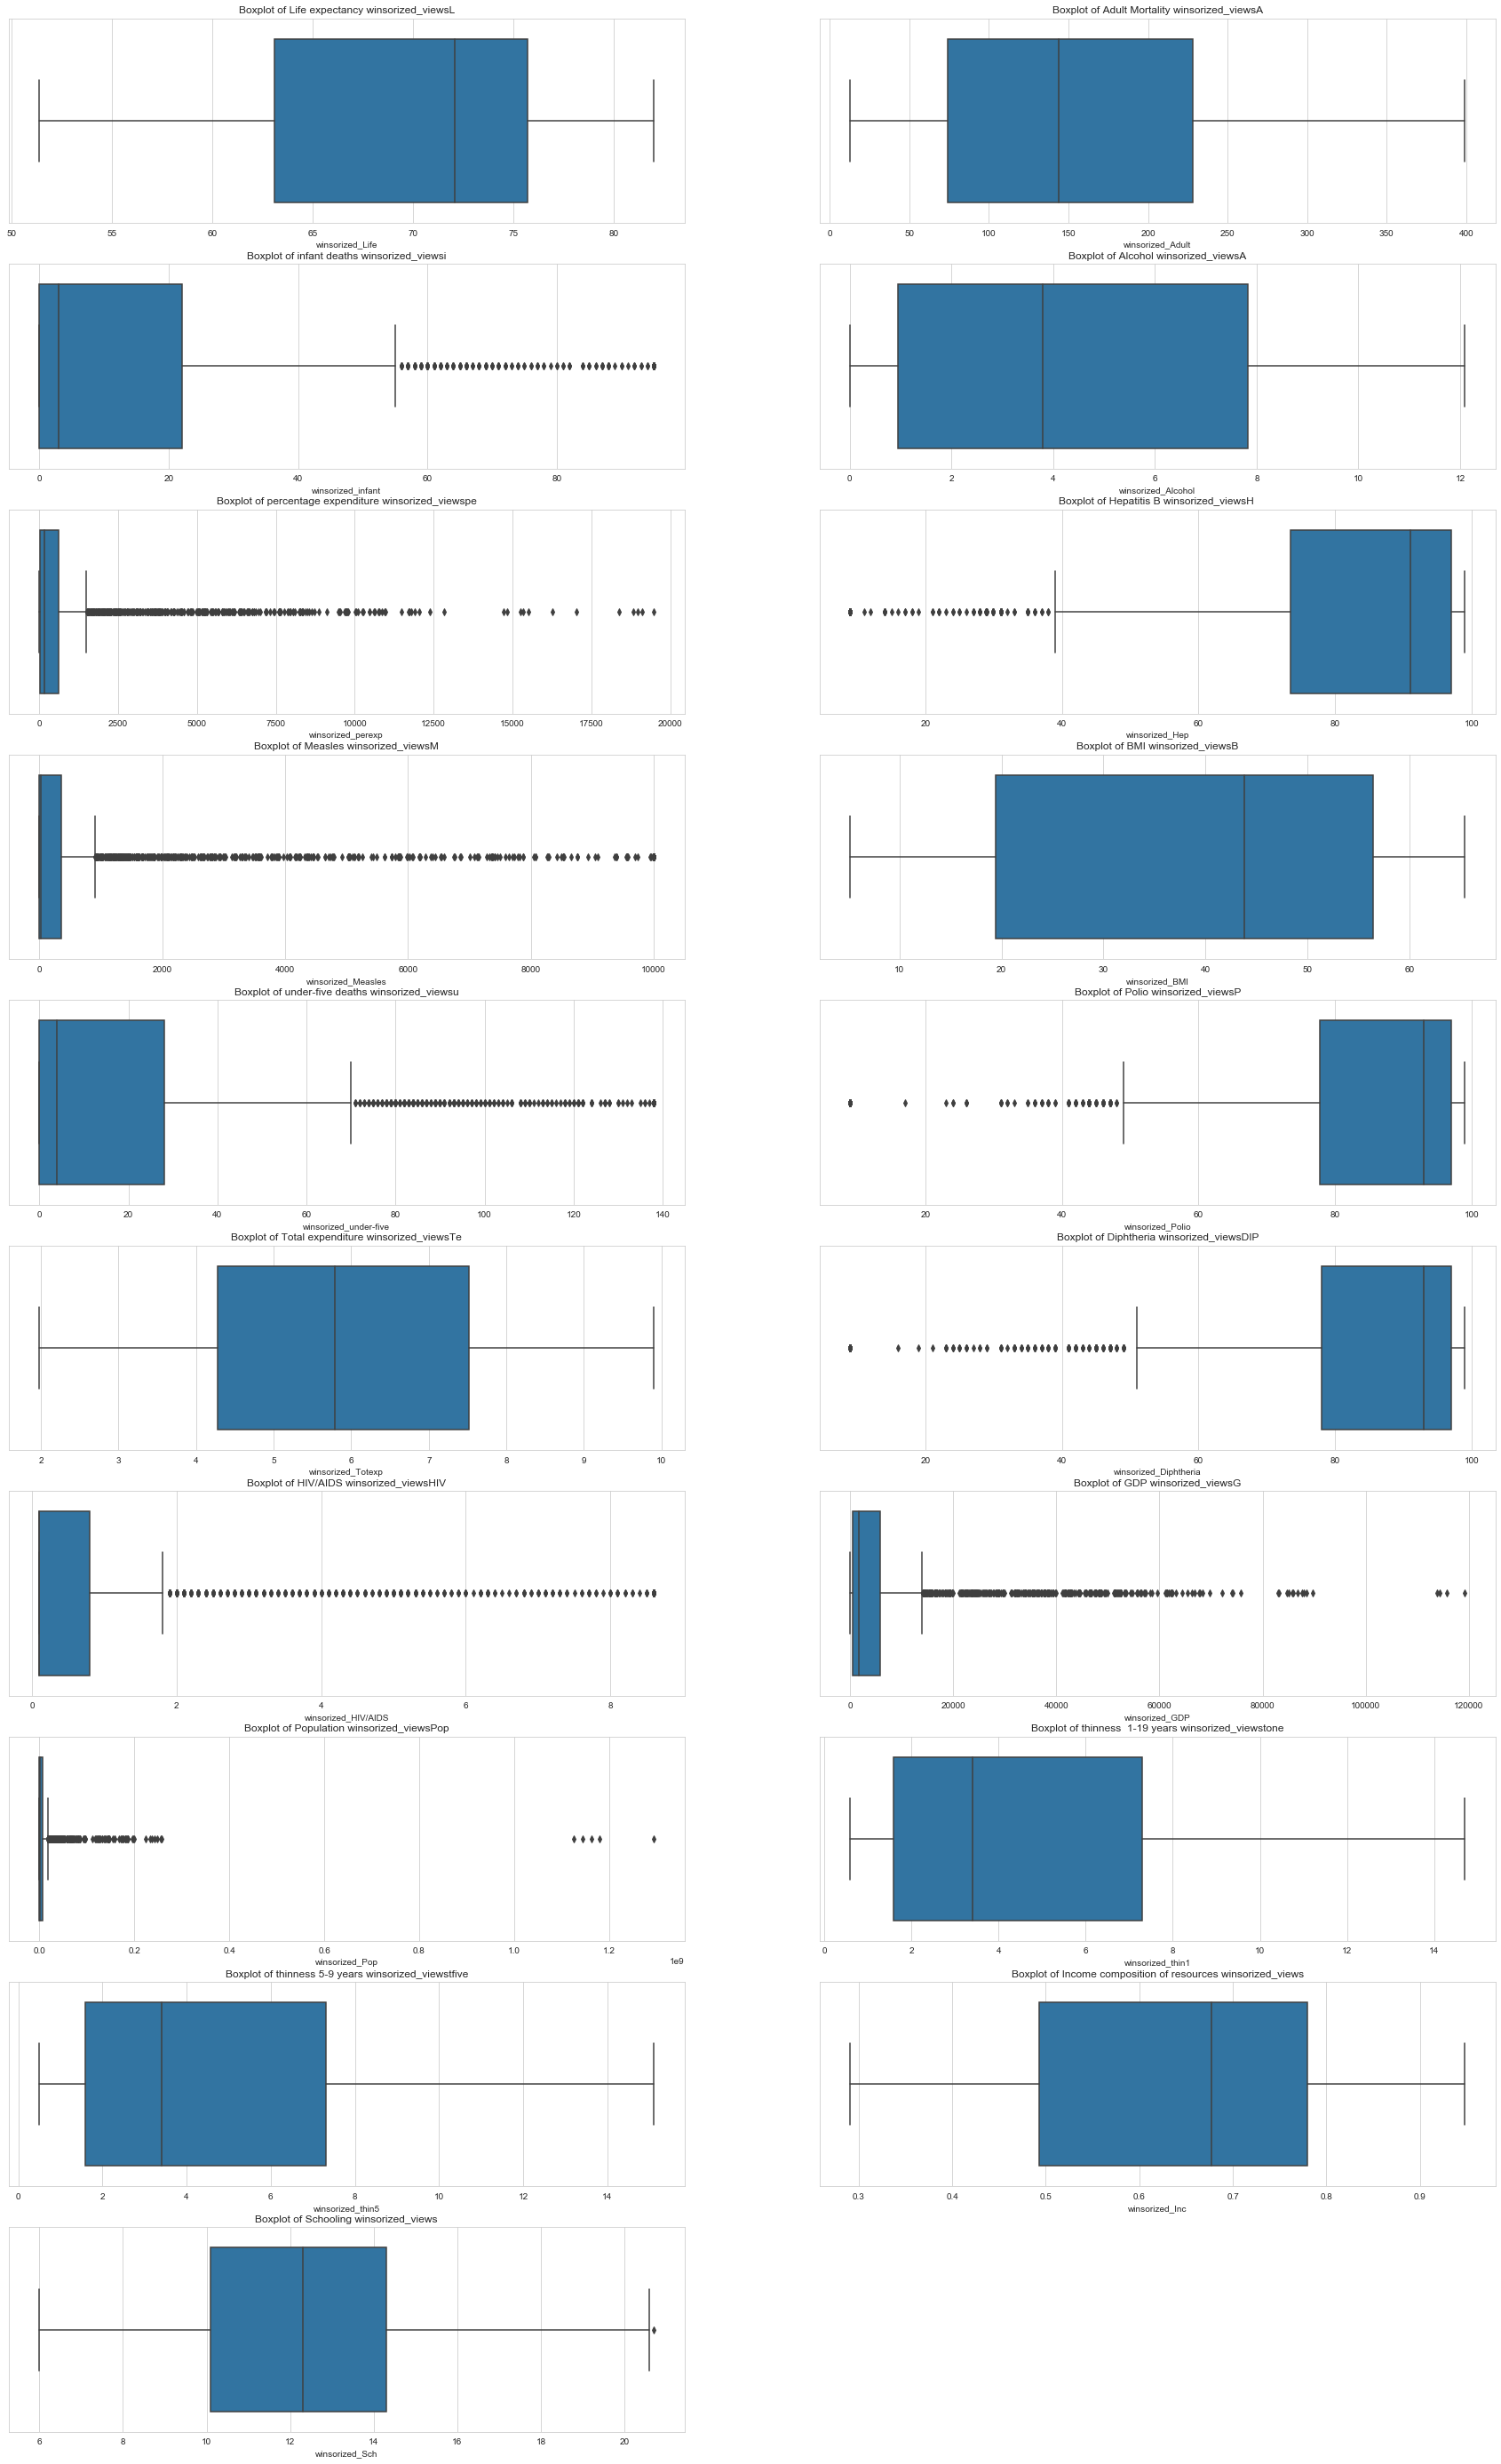

In [409]:
#plotting figure 
plt.figure(figsize=(30,50))

plt.subplot(10,2,1)
sns.boxplot(life_expectancy_c["winsorized_Life"])
plt.title("Boxplot of Life expectancy winsorized_viewsL")

plt.subplot(10,2,2)
sns.boxplot(life_expectancy_c["winsorized_Adult"])
plt.title("Boxplot of Adult Mortality winsorized_viewsA")

plt.subplot(10,2,3)
sns.boxplot(life_expectancy_c["winsorized_infant"])
plt.title("Boxplot of infant deaths winsorized_viewsi")

plt.subplot(10,2,4)
sns.boxplot(life_expectancy_c["winsorized_Alcohol"])
plt.title("Boxplot of Alcohol winsorized_viewsA")

plt.subplot(10,2,5)
sns.boxplot(life_expectancy_c["winsorized_perexp"])
plt.title("Boxplot of percentage expenditure winsorized_viewspe")

plt.subplot(10,2,6)
sns.boxplot(life_expectancy_c["winsorized_Hep"])
plt.title("Boxplot of Hepatitis B winsorized_viewsH ")

plt.subplot(10,2,7)
sns.boxplot(life_expectancy_c["winsorized_Measles"])
plt.title("Boxplot of Measles winsorized_viewsM")

plt.subplot(10,2,8)
sns.boxplot(life_expectancy_c["winsorized_BMI"])
plt.title("Boxplot of BMI winsorized_viewsB")

plt.subplot(10,2,9)
sns.boxplot(life_expectancy_c["winsorized_under-five"])
plt.title("Boxplot of under-five deaths winsorized_viewsu")

plt.subplot(10,2,10)
sns.boxplot(life_expectancy_c["winsorized_Polio"])
plt.title("Boxplot of Polio winsorized_viewsP")

plt.subplot(10,2,11)
sns.boxplot(life_expectancy_c["winsorized_Totexp"])
plt.title("Boxplot of Total expenditure winsorized_viewsTe")

plt.subplot(10,2,12)
sns.boxplot(life_expectancy_c["winsorized_Diphtheria"])
plt.title("Boxplot of Diphtheria winsorized_viewsDIP")

plt.subplot(10,2,13)
sns.boxplot(life_expectancy_c["winsorized_HIV/AIDS"])
plt.title("Boxplot of HIV/AIDS winsorized_viewsHIV")

plt.subplot(10,2,14)
sns.boxplot(life_expectancy_c["winsorized_GDP"])
plt.title("Boxplot of GDP winsorized_viewsG")

plt.subplot(10,2,15)
sns.boxplot(life_expectancy_c["winsorized_Pop"])
plt.title("Boxplot of Population winsorized_viewsPop")

plt.subplot(10,2,16)
sns.boxplot(life_expectancy_c["winsorized_thin1"])
plt.title("Boxplot of thinness  1-19 years winsorized_viewstone")

plt.subplot(10,2,17)
sns.boxplot(life_expectancy_c["winsorized_thin5"])
plt.title("Boxplot of thinness 5-9 years winsorized_viewstfive")

plt.subplot(10,2,18)
sns.boxplot(life_expectancy_c["winsorized_Inc"])
plt.title("Boxplot of Income composition of resources winsorized_views")

plt.subplot(10,2,19)
sns.boxplot(life_expectancy_c["winsorized_Sch"])
plt.title("Boxplot of Schooling winsorized_views")


plt.show()


After, winsorization, we can see outliers is limited to some extent.

Now Lets find by how much it decreases the number of outliers by using Tukey's method: 

In [410]:
life_exp_winskey= life_expectancy_c[["winsorized_Life", "winsorized_Adult", "winsorized_infant", "winsorized_Alcohol",
                                     "winsorized_perexp", "winsorized_Hep", "winsorized_Measles", "winsorized_BMI",
                                     "winsorized_under-five", "winsorized_Polio", "winsorized_Totexp", "winsorized_Diphtheria", 
                                     "winsorized_HIV/AIDS", "winsorized_GDP", "winsorized_Pop", "winsorized_thin1",
                                     "winsorized_thin5", "winsorized_Inc", "winsorized_Sch"
                                    ]]

# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
Q1 = life_exp_winskey.quantile(0.25)
Q3 = life_exp_winskey.quantile(0.75)

iqr = Q3 - Q1

for threshold in np.arange(1,5,0.5):
    min_val = Q1 - (iqr*threshold)
    max_val = Q3 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((life_exp_winskey > max_val) 
                      | (life_exp_winskey < min_val))[0]))))

The score threshold is: 1.0
Number of outliers is: 5005
The score threshold is: 1.5
Number of outliers is: 3648
The score threshold is: 2.0
Number of outliers is: 3046
The score threshold is: 2.5
Number of outliers is: 2691
The score threshold is: 3.0
Number of outliers is: 2280
The score threshold is: 3.5
Number of outliers is: 1963
The score threshold is: 4.0
Number of outliers is: 1366
The score threshold is: 4.5
Number of outliers is: 1277


As, we can see after winsorization some of the outliers were capped, but not all.

Now, Lets move to the data exploration,

### Data Exploration:


Lets see the correlation between al the features to life expectancy:

In [411]:
life_expectancy_c.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,winsorized_Polio,winsorized_Totexp,winsorized_Diphtheria,winsorized_HIV/AIDS,winsorized_GDP,winsorized_Pop,winsorized_thin1,winsorized_thin5,winsorized_Inc,winsorized_Sch
Year,1.000000,0.170033,-0.079052,-0.036464,-0.044285,0.078702,0.143523,-0.081840,0.104668,-0.041980,...,0.097952,0.072099,0.137583,-0.115567,0.101374,0.016772,-0.044950,-0.044679,0.214000,0.201760
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.407923,0.432260,0.313494,-0.157586,0.567694,-0.222529,...,0.472560,0.225138,0.486061,-0.713769,0.461840,-0.021389,-0.534192,-0.529697,0.826378,0.779548
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.199026,-0.268144,-0.179305,0.031176,-0.387017,0.094146,...,-0.282401,-0.115817,-0.282348,0.594015,-0.297849,-0.013867,0.356898,0.362765,-0.527559,-0.467257
infant deaths,-0.036464,-0.196557,0.078756,1.000000,-0.116831,-0.095179,-0.218736,0.501038,-0.227480,0.996628,...,-0.170649,-0.140354,-0.175225,0.072746,-0.108170,0.556809,0.301866,0.304712,-0.175356,-0.211561
Alcohol,-0.044285,0.407923,-0.199026,-0.116831,1.000000,0.387546,0.091511,-0.054338,0.335876,-0.113417,...,0.226439,0.310023,0.220241,-0.093466,0.356223,-0.034186,-0.460414,-0.450474,0.517732,0.571940
percentage expenditure,0.078702,0.432260,-0.268144,-0.095179,0.387546,1.000000,0.027409,-0.065359,0.271206,-0.097882,...,0.176280,0.215264,0.169750,-0.174394,0.905700,-0.026409,-0.311158,-0.315041,0.470918,0.446870
Hepatitis B,0.143523,0.313494,-0.179305,-0.218736,0.091511,0.027409,1.000000,-0.137645,0.193535,-0.229267,...,0.506729,0.104978,0.604383,-0.224365,0.080955,-0.106658,-0.151549,-0.154722,0.264010,0.282006
Measles,-0.081840,-0.157586,0.031176,0.501038,-0.054338,-0.065359,-0.137645,1.000000,-0.176069,0.507718,...,-0.134621,-0.108942,-0.140969,0.080286,-0.076165,0.265983,0.178163,0.174948,-0.134197,-0.146362
BMI,0.104668,0.567694,-0.387017,-0.227480,0.335876,0.271206,0.193535,-0.176069,1.000000,-0.237910,...,0.288681,0.222791,0.287163,-0.386556,0.304228,-0.071680,-0.554496,-0.563131,0.579539,0.577195
under-five deaths,-0.041980,-0.222529,0.094146,0.996628,-0.113417,-0.097882,-0.229267,0.507718,-0.237910,1.000000,...,-0.188803,-0.141028,-0.195870,0.096543,-0.112005,0.544430,0.311814,0.313409,-0.194000,-0.226786


Life expectancy is highly correlated to Schooling and Income composition of resources, and is negatively correlated to Adult mortality, HIV/AIDS, thinness 1-19 years, thinness 5-9 years, little bit to infant deaths, Measles, under-five deaths, and Population.

From the table, under five death is higly correlated to infant death, percentage expenditure is highly correlated to GDP, thinness 1-19 years is highly correlated to thinness 5-9 years,and Schooling and Income composition of resources is highly correlated to each others.


After capping outliers, correlation with life expectancy of all other features is little different now, like Adult mortality, Alcohol, BMI, are decreases by some points, where, infant death relation, Hepatitis B, Measles, under-five deaths, HIV/AIDS, thinness 1-19 years, thinness 5-9 years, Income composition of resources, and Schooling are increases by some point.

Lets go through visualization to see the corelation between all the features.

### Visualization of Correlation of all features: Using Heatmap

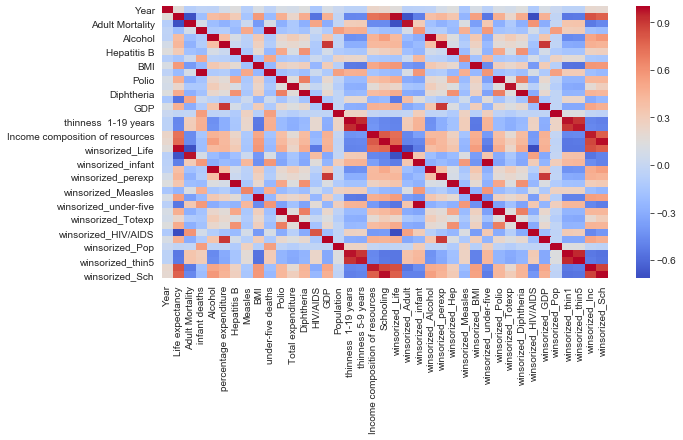

In [412]:
plt.figure(figsize=(10,5))
sns.heatmap(life_expectancy_c.corr(),cmap='coolwarm')

Yes, from heatmap we can see the positive relation and negative relation of features with life expectancy, as Adult mortality is highly negative to life expectancy and income composition of resources and schooling is highly povitve to life expectancy.

Lets, see statistical description:

### Describe:

In [413]:
# Statistical decription after fixing missing values and outliers
life_expectancy_c.describe()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,winsorized_Polio,winsorized_Totexp,winsorized_Diphtheria,winsorized_HIV/AIDS,winsorized_GDP,winsorized_Pop,winsorized_thin1,winsorized_thin5,winsorized_Inc,winsorized_Sch
count,2928.00000,2928.000000,2928.000000,2928.000000,2912.000000,2512.000000,2784.000000,2928.000000,2896.000000,2928.000000,...,2928.000000,2928.000000,2928.000000,2928.000000,2528.000000,2.288000e+03,2928.000000,2928.000000,2768.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.612109,921.520434,78.657263,2427.855874,38.235394,42.179303,...,82.479245,5.890707,82.269614,1.172439,7391.304838,1.274643e+07,4.813149,4.839071,0.641189,12.104552
std,4.61056,9.523867,124.292079,118.114450,4.037383,2153.254724,25.141562,11485.970937,19.959590,160.700547,...,23.189539,2.209981,23.450719,2.259797,14182.755439,6.098576e+07,3.989006,4.058225,0.176275,3.083381
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.099872,1.000000,0.000000,1.000000,0.000000,...,9.000000,1.980000,9.000000,0.100000,81.683884,1.492800e+04,0.600000,0.500000,0.291000,6.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.930000,37.824527,72.000000,0.000000,19.300000,0.000000,...,77.750000,4.280000,78.000000,0.100000,459.189489,1.967585e+05,1.600000,1.600000,0.493000,10.100000
50%,2007.50000,72.100000,144.000000,3.000000,3.760000,157.016956,89.000000,17.000000,43.350000,4.000000,...,93.000000,5.785000,93.000000,0.100000,1725.638418,1.396804e+06,3.400000,3.400000,0.677000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.702500,623.991583,96.000000,362.250000,56.100000,28.000000,...,97.000000,7.515000,97.000000,0.800000,5837.486028,7.414499e+06,7.300000,7.300000,0.779250,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,...,99.000000,9.900000,99.000000,8.600000,119172.741800,1.293859e+09,14.700000,15.100000,0.948000,20.700000


Now, there is only 2928 rows instead of 2938 after dropping few rows. 
Winsorized columns have lower number of rows in few of the columns, may be because of capped outliers.


Percentage expenditure's minimum value is some decimal than 0.


Lets visualization of developing and developed countries and their growth in life expectancy from 2000 to 2015.

### Visualization for categorical variable: Status


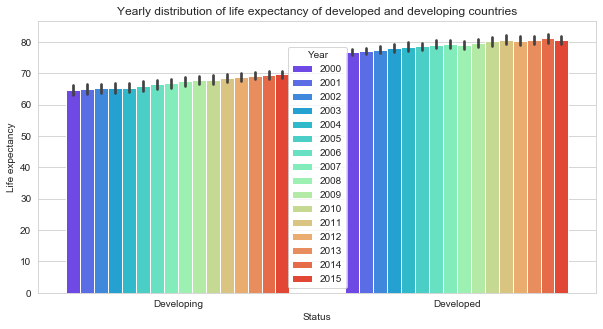

Status
Developed     79.197852
Developing    67.111465
Name: Life expectancy, dtype: float64


In [414]:
# bar chart of status and life-expectancy
plt.figure(figsize=(10,5))
sns.barplot(life_expectancy_c['Status'], life_expectancy_c['Life expectancy'], hue=life_expectancy_c['Year'], palette='rainbow')
plt.title('Yearly distribution of life expectancy of developed and developing countries' )
plt.show()
print(life_expectancy_c.groupby('Status')['Life expectancy'].mean())

Developed countries have higher life expectancy than developing countries and it is increasing every year.

#### Bivariate analysis: Continuous vs. Continuous

To see the relationship between life expectancy and all other features, we will ise scatterplot for visualization:

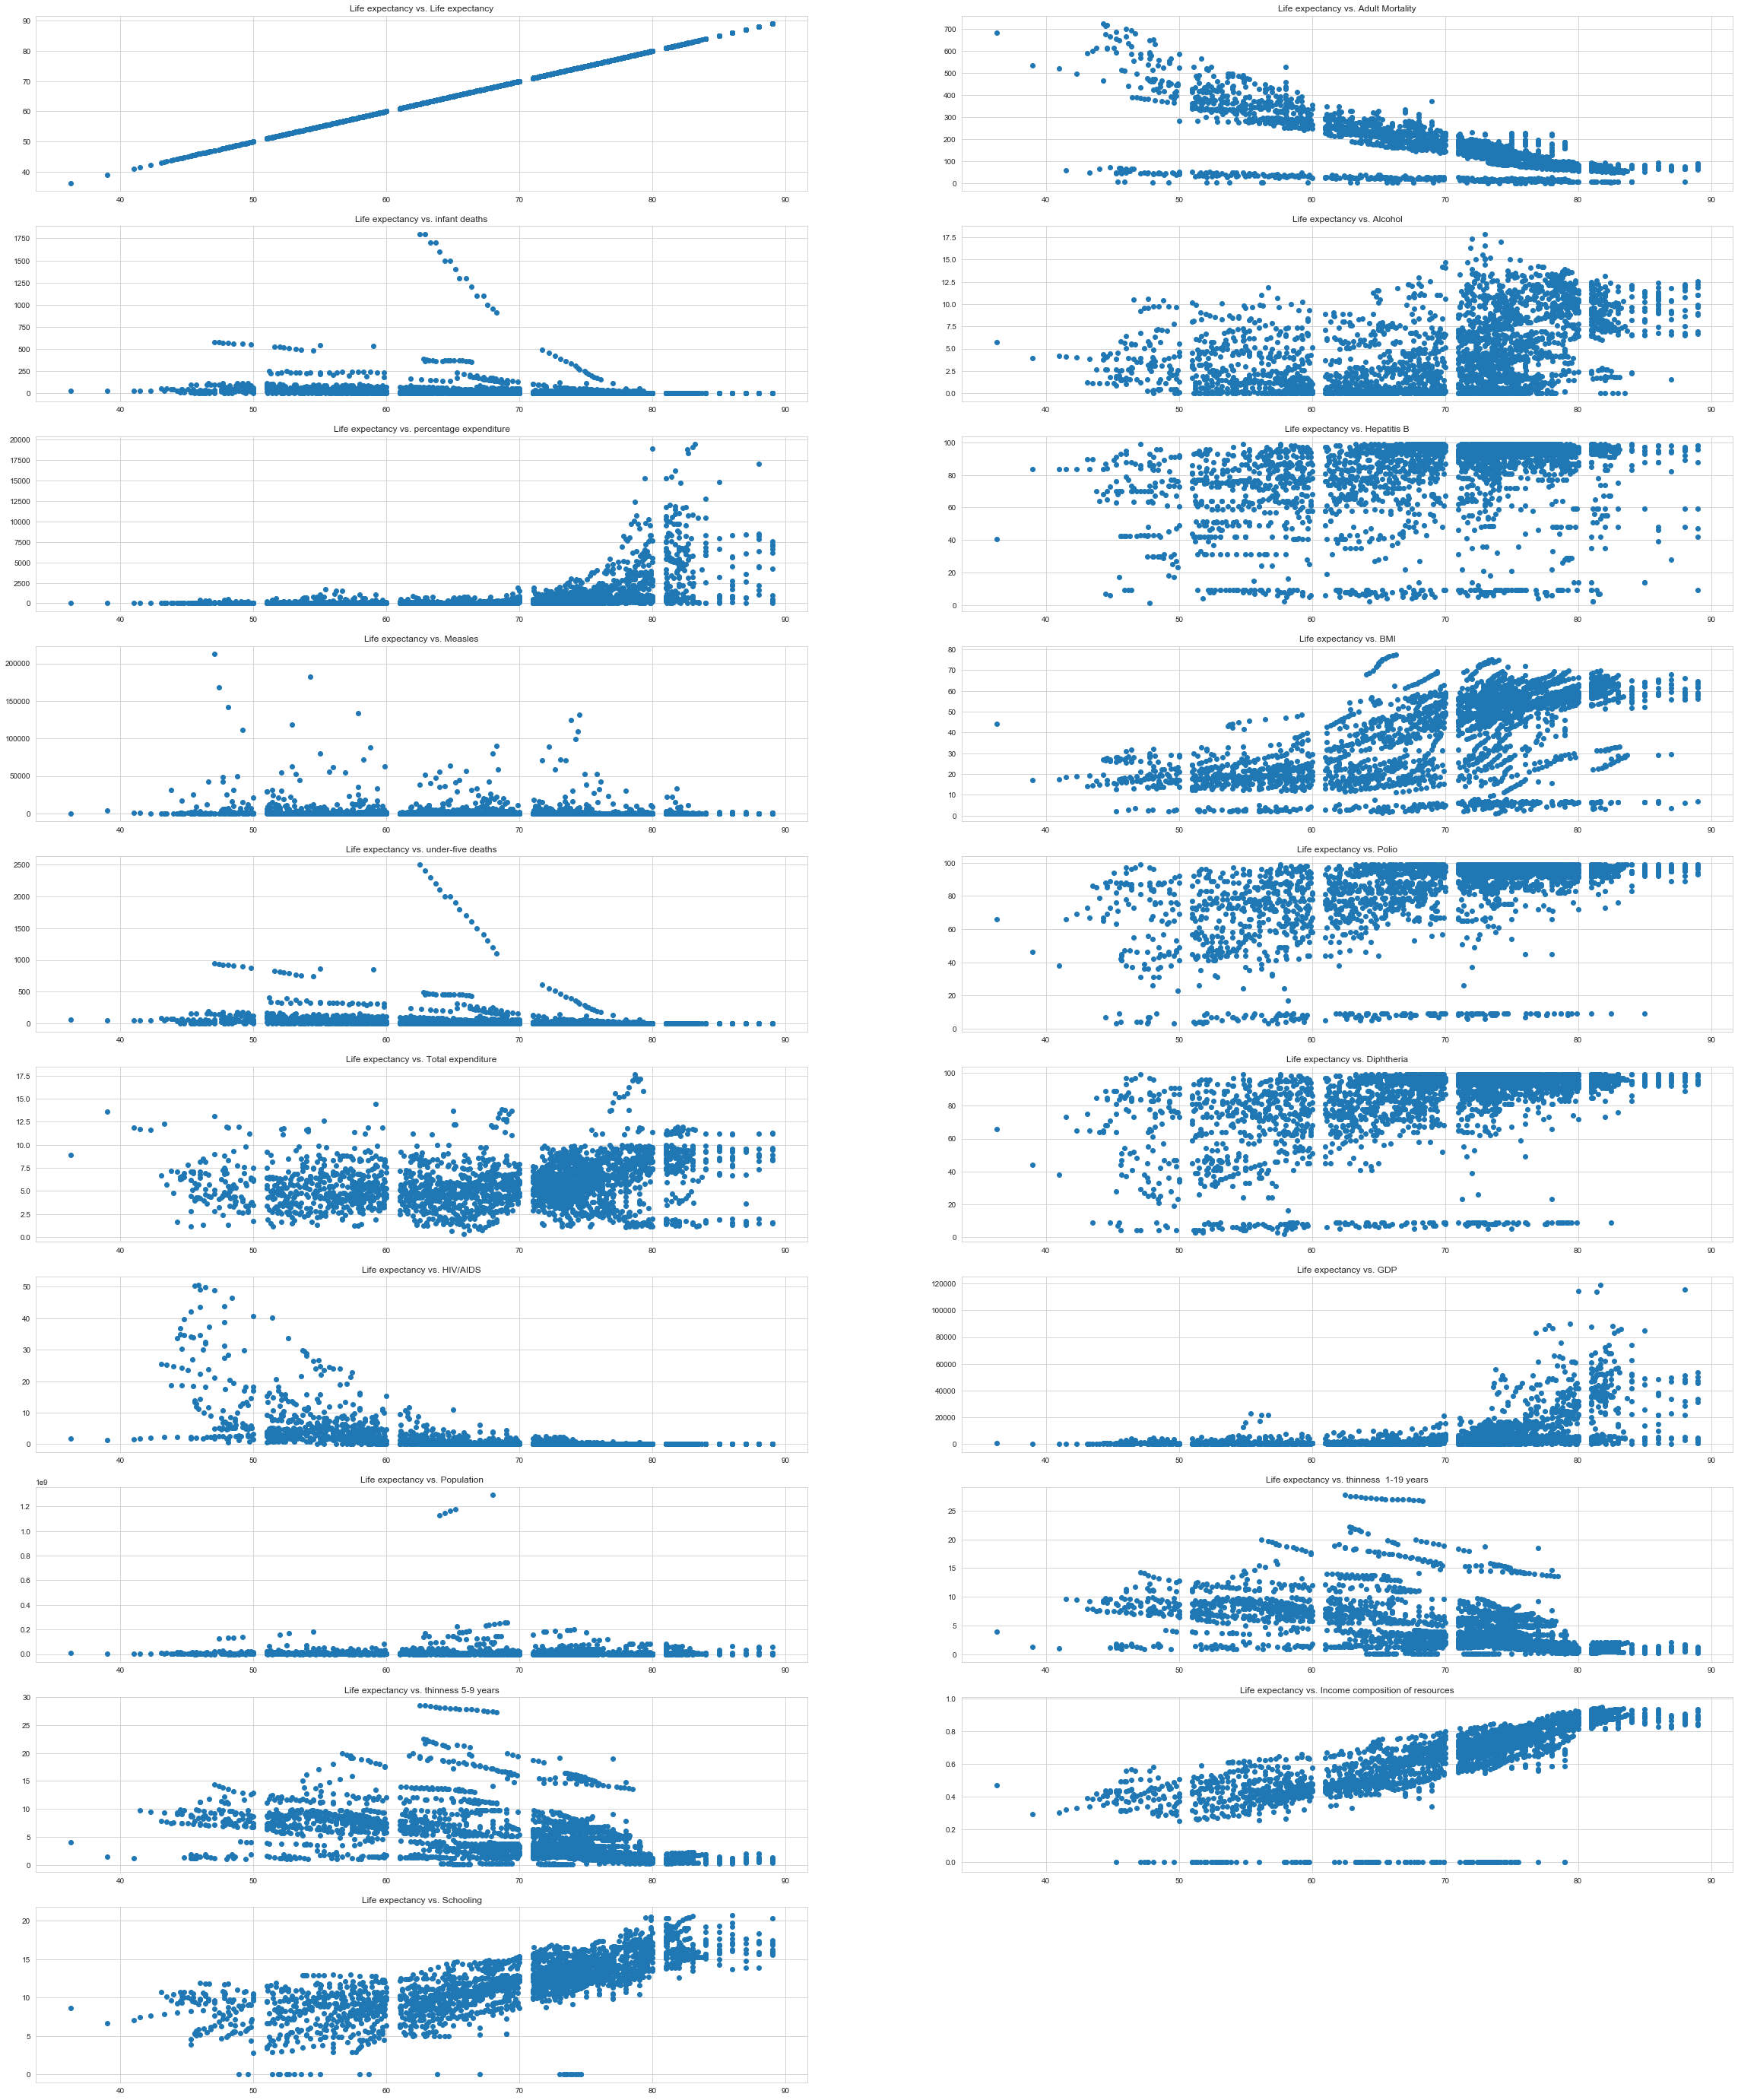

In [415]:
#plotting figure
plt.figure(figsize=(40,50))

#subplots of scatteplot
plt.subplot(10,2,1)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Life expectancy"])
plt.title("Life expectancy vs. Life expectancy")

plt.subplot(10,2,2)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Adult Mortality"])
plt.title("Life expectancy vs. Adult Mortality")

plt.subplot(10,2,3)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["infant deaths"])
plt.title("Life expectancy vs. infant deaths")

plt.subplot(10,2,4)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Alcohol"])
plt.title("Life expectancy vs. Alcohol")

plt.subplot(10,2,5)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["percentage expenditure"])
plt.title("Life expectancy vs. percentage expenditure")

plt.subplot(10,2,6)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Hepatitis B"])
plt.title("Life expectancy vs. Hepatitis B")

plt.subplot(10,2,7)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Measles"])
plt.title("Life expectancy vs. Measles")

plt.subplot(10,2,8)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["BMI"])
plt.title("Life expectancy vs. BMI")

plt.subplot(10,2,9)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["under-five deaths"])
plt.title("Life expectancy vs. under-five deaths")

plt.subplot(10,2,10)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Polio"])
plt.title("Life expectancy vs. Polio")

plt.subplot(10,2,11)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Total expenditure"])
plt.title("Life expectancy vs. Total expenditure")

plt.subplot(10,2,12)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Diphtheria"])
plt.title("Life expectancy vs. Diphtheria")

plt.subplot(10,2,13)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["HIV/AIDS"])
plt.title("Life expectancy vs. HIV/AIDS")

plt.subplot(10,2,14)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["GDP"])
plt.title("Life expectancy vs. GDP")

plt.subplot(10,2,15)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Population"])
plt.title("Life expectancy vs. Population")

plt.subplot(10,2,16)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["thinness  1-19 years"])
plt.title("Life expectancy vs. thinness  1-19 years")

plt.subplot(10,2,17)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["thinness 5-9 years"])
plt.title("Life expectancy vs. thinness 5-9 years")

plt.subplot(10,2,18)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Income composition of resources"])
plt.title("Life expectancy vs. Income composition of resources")

plt.subplot(10,2,19)
plt.scatter(life_expectancy_c["Life expectancy"], life_expectancy_c["Schooling"])
plt.title("Life expectancy vs. Schooling")


plt.show()


As we can see from scatterplot, Life expectancy and Adult Mortality showing negative relationship, Life expectancy and Alcohol got little positive relationship, Life expectancy and percentage expenditure has no relation at first but after certain expectancy it is positively radiated, Schooling and Income shows thick but positive relationship with life expectancy, Population shows no relation at all with life expectancy.

### Feature engineering:

Box-Cox, log, and square root transformations only work when all datapoints are positive.

Lets, normalize/standadize winsorized features.

### Normalization and standardization:

Normalization of a variable into the [0,1] range (including 0 and 1).
Standardization of a variable so its mean becomes 0 and its standard deviation becomes 1.

### Normalization:

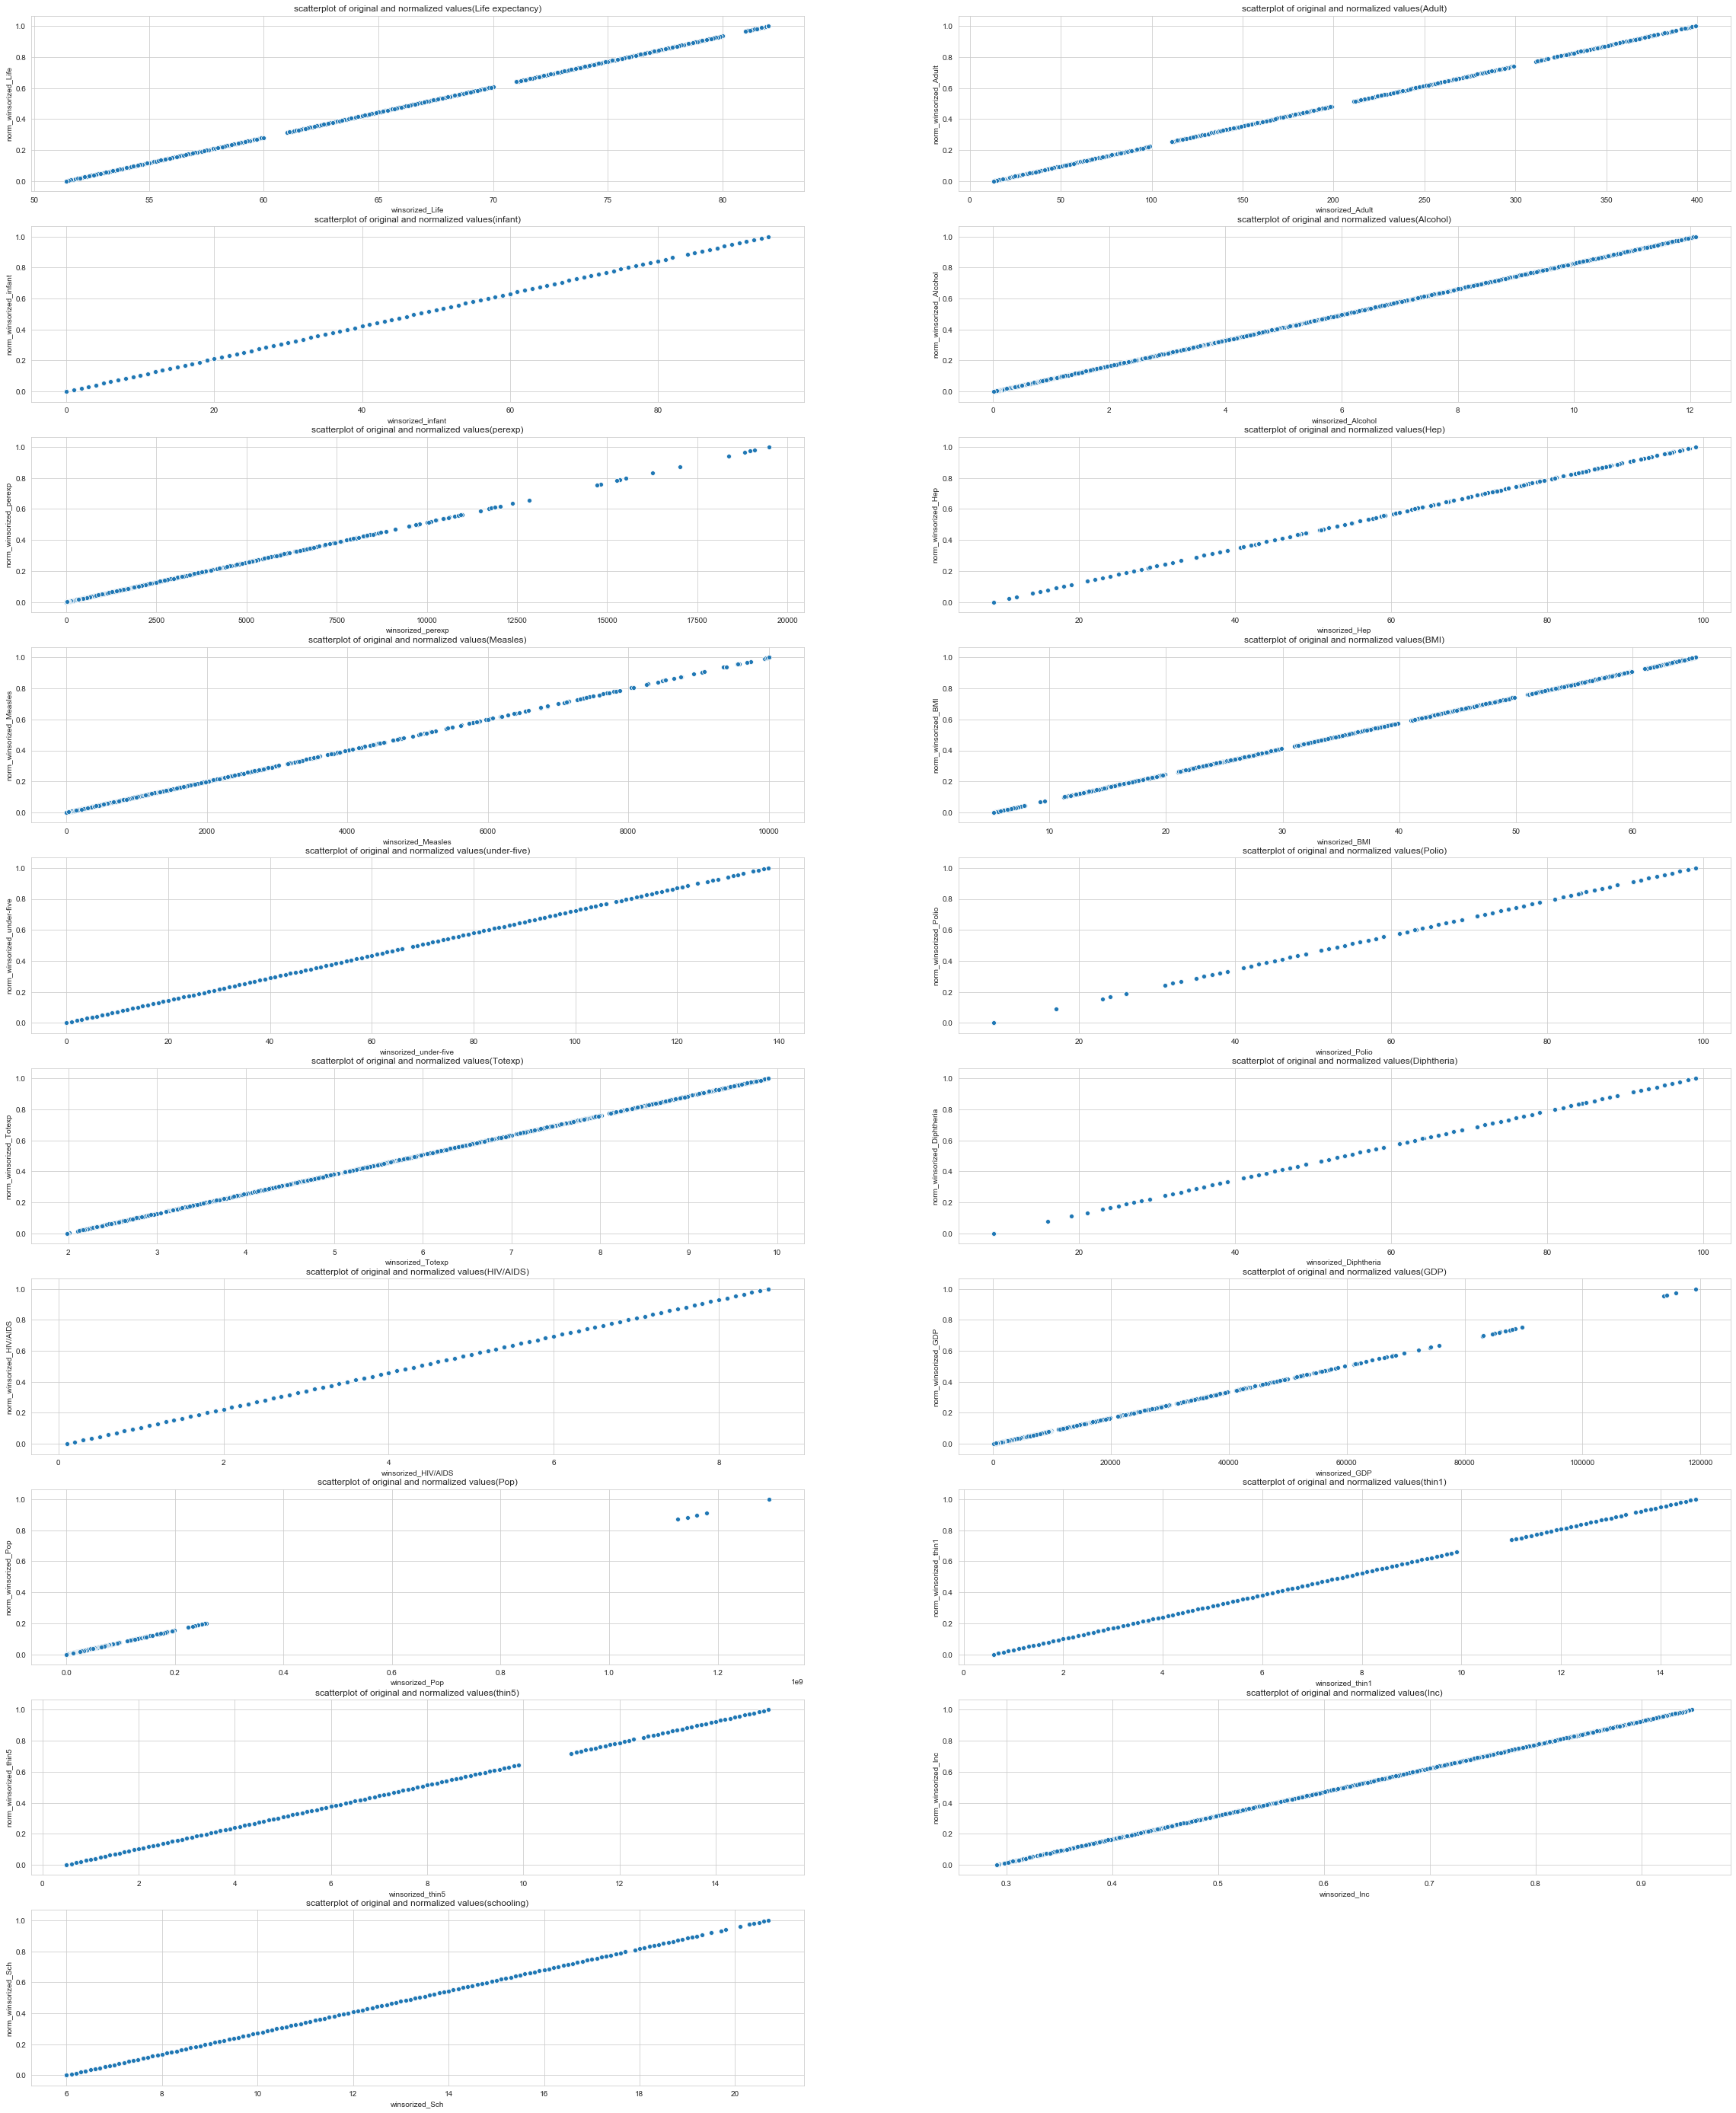

In [416]:
# normalizing the winsorized variables(rescaling) without using sklearn to avoid nan/infinity value.

life_expectancy_c["norm_winsorized_Life"] = (life_expectancy_c["winsorized_Life"]-life_expectancy_c["winsorized_Life"].min())/(life_expectancy_c["winsorized_Life"].max()-life_expectancy_c["winsorized_Life"].min())


life_expectancy_c["norm_winsorized_Adult"] = (life_expectancy_c["winsorized_Adult"]-life_expectancy_c["winsorized_Adult"].min())/(life_expectancy_c["winsorized_Adult"].max()-life_expectancy_c["winsorized_Adult"].min())

life_expectancy_c["norm_winsorized_infant"] = (life_expectancy_c["winsorized_infant"]-life_expectancy_c["winsorized_infant"].min())/(life_expectancy_c["winsorized_infant"].max()-life_expectancy_c["winsorized_infant"].min()) 


life_expectancy_c["norm_winsorized_Alcohol"] = (life_expectancy_c["winsorized_Alcohol"]-life_expectancy_c["winsorized_Alcohol"].min())/(life_expectancy_c["winsorized_Alcohol"].max()-life_expectancy_c["winsorized_Alcohol"].min())


life_expectancy_c["norm_winsorized_perexp"] = (life_expectancy_c["winsorized_perexp"]-life_expectancy_c["winsorized_perexp"].min())/(life_expectancy_c["winsorized_perexp"].max()-life_expectancy_c["winsorized_perexp"].min())

life_expectancy_c["norm_winsorized_Hep"] = (life_expectancy_c["winsorized_Hep"]-life_expectancy_c["winsorized_Hep"].min())/(life_expectancy_c["winsorized_Hep"].max()-life_expectancy_c["winsorized_Hep"].min())


life_expectancy_c["norm_winsorized_Measles"] = (life_expectancy_c["winsorized_Measles"]-life_expectancy_c["winsorized_Measles"].min())/(life_expectancy_c["winsorized_Measles"].max()-life_expectancy_c["winsorized_Measles"].min())


life_expectancy_c["norm_winsorized_BMI"]= (life_expectancy_c["winsorized_BMI"]-life_expectancy_c["winsorized_BMI"].min())/(life_expectancy_c["winsorized_BMI"].max()-life_expectancy_c["winsorized_BMI"].min())


life_expectancy_c["norm_winsorized_under-five"]= (life_expectancy_c["winsorized_under-five"]-life_expectancy_c["winsorized_under-five"].min())/(life_expectancy_c["winsorized_under-five"].max()-life_expectancy_c["winsorized_under-five"].min())


life_expectancy_c["norm_winsorized_Polio"]= (life_expectancy_c["winsorized_Polio"]-life_expectancy_c["winsorized_Polio"].min())/(life_expectancy_c["winsorized_Polio"].max()-life_expectancy_c["winsorized_Polio"].min())

life_expectancy_c["norm_winsorized_Totexp"]= (life_expectancy_c["winsorized_Totexp"]-life_expectancy_c["winsorized_Totexp"].min())/(life_expectancy_c["winsorized_Totexp"].max()-life_expectancy_c["winsorized_Totexp"].min())


life_expectancy_c["norm_winsorized_Diphtheria"]= (life_expectancy_c["winsorized_Diphtheria"]-life_expectancy_c["winsorized_Diphtheria"].min())/(life_expectancy_c["winsorized_Diphtheria"].max()-life_expectancy_c["winsorized_Diphtheria"].min())


life_expectancy_c["norm_winsorized_HIV/AIDS"]= (life_expectancy_c["winsorized_HIV/AIDS"]-life_expectancy_c["winsorized_HIV/AIDS"].min())/(life_expectancy_c["winsorized_HIV/AIDS"].max()-life_expectancy_c["winsorized_HIV/AIDS"].min())


life_expectancy_c["norm_winsorized_GDP"]= (life_expectancy_c["winsorized_GDP"]-life_expectancy_c["winsorized_GDP"].min())/(life_expectancy_c["winsorized_GDP"].max()-life_expectancy_c["winsorized_GDP"].min())


life_expectancy_c["norm_winsorized_Pop"]= (life_expectancy_c["winsorized_Pop"]-life_expectancy_c["winsorized_Pop"].min())/(life_expectancy_c["winsorized_Pop"].max()-life_expectancy_c["winsorized_Pop"].min())


life_expectancy_c["norm_winsorized_thin1"]= (life_expectancy_c["winsorized_thin1"]-life_expectancy_c["winsorized_thin1"].min())/(life_expectancy_c["winsorized_thin1"].max()-life_expectancy_c["winsorized_thin1"].min())

life_expectancy_c["norm_winsorized_thin5"]= (life_expectancy_c["winsorized_thin5"]-life_expectancy_c["winsorized_thin5"].min())/(life_expectancy_c["winsorized_thin5"].max()-life_expectancy_c["winsorized_thin5"].min())

life_expectancy_c["norm_winsorized_Inc"]= (life_expectancy_c["winsorized_Inc"]-life_expectancy_c["winsorized_Inc"].min())/(life_expectancy_c["winsorized_Inc"].max()-life_expectancy_c["winsorized_Inc"].min())


life_expectancy_c["norm_winsorized_Sch"]= (life_expectancy_c["winsorized_Sch"]-life_expectancy_c["winsorized_Sch"].min())/(life_expectancy_c["winsorized_Sch"].max()-life_expectancy_c["winsorized_Sch"].min())




plt.figure(figsize=(40,50))

# draw the scatter plot using seaborn to narmalization between original winsorized data and normalized-winsorized data
plt.subplot(10,2,1)
sns.scatterplot(life_expectancy_c["winsorized_Life"], life_expectancy_c["norm_winsorized_Life"])
plt.title("scatterplot of original and normalized values(Life expectancy)")

plt.subplot(10,2,2)
sns.scatterplot(life_expectancy_c["winsorized_Adult"], life_expectancy_c["norm_winsorized_Adult"])
plt.title("scatterplot of original and normalized values(Adult)")

plt.subplot(10,2,3)
sns.scatterplot(life_expectancy_c["winsorized_infant"], life_expectancy_c["norm_winsorized_infant"])
plt.title("scatterplot of original and normalized values(infant)")

plt.subplot(10,2,4)
sns.scatterplot(life_expectancy_c["winsorized_Alcohol"], life_expectancy_c["norm_winsorized_Alcohol"])
plt.title("scatterplot of original and normalized values(Alcohol)")

plt.subplot(10,2,5)
sns.scatterplot(life_expectancy_c["winsorized_perexp"], life_expectancy_c["norm_winsorized_perexp"])
plt.title("scatterplot of original and normalized values(perexp)")

plt.subplot(10,2,6)
sns.scatterplot(life_expectancy_c["winsorized_Hep"], life_expectancy_c["norm_winsorized_Hep"])
plt.title("scatterplot of original and normalized values(Hep)")

plt.subplot(10,2,7)
sns.scatterplot(life_expectancy_c["winsorized_Measles"], life_expectancy_c["norm_winsorized_Measles"])
plt.title("scatterplot of original and normalized values(Measles)")

plt.subplot(10,2,8)
sns.scatterplot(life_expectancy_c["winsorized_BMI"], life_expectancy_c["norm_winsorized_BMI"])
plt.title("scatterplot of original and normalized values(BMI)")


plt.subplot(10,2,9)
sns.scatterplot(life_expectancy_c["winsorized_under-five"], life_expectancy_c["norm_winsorized_under-five"])
plt.title("scatterplot of original and normalized values(under-five)")

plt.subplot(10,2,10)
sns.scatterplot(life_expectancy_c["winsorized_Polio"], life_expectancy_c["norm_winsorized_Polio"])
plt.title("scatterplot of original and normalized values(Polio)")


plt.subplot(10,2,11)
sns.scatterplot(life_expectancy_c["winsorized_Totexp"], life_expectancy_c["norm_winsorized_Totexp"])
plt.title("scatterplot of original and normalized values(Totexp)")


plt.subplot(10,2,12)
sns.scatterplot(life_expectancy_c["winsorized_Diphtheria"], life_expectancy_c["norm_winsorized_Diphtheria"])
plt.title("scatterplot of original and normalized values(Diphtheria)")

plt.subplot(10,2,13)
sns.scatterplot(life_expectancy_c["winsorized_HIV/AIDS"], life_expectancy_c["norm_winsorized_HIV/AIDS"])
plt.title("scatterplot of original and normalized values(HIV/AIDS)")

plt.subplot(10,2,14)
sns.scatterplot(life_expectancy_c["winsorized_GDP"], life_expectancy_c["norm_winsorized_GDP"])
plt.title("scatterplot of original and normalized values(GDP)")


plt.subplot(10,2,15)
sns.scatterplot(life_expectancy_c["winsorized_Pop"], life_expectancy_c["norm_winsorized_Pop"])
plt.title("scatterplot of original and normalized values(Pop)")


plt.subplot(10,2,16)
sns.scatterplot(life_expectancy_c["winsorized_thin1"], life_expectancy_c["norm_winsorized_thin1"])
plt.title("scatterplot of original and normalized values(thin1)")


plt.subplot(10,2,17)
sns.scatterplot(life_expectancy_c["winsorized_thin5"], life_expectancy_c["norm_winsorized_thin5"])
plt.title("scatterplot of original and normalized values(thin5)")


plt.subplot(10,2,18)
sns.scatterplot(life_expectancy_c["winsorized_Inc"], life_expectancy_c["norm_winsorized_Inc"])
plt.title("scatterplot of original and normalized values(Inc)")

plt.subplot(10,2,19)
sns.scatterplot(life_expectancy_c["winsorized_Sch"], life_expectancy_c["norm_winsorized_Sch"])
plt.title("scatterplot of original and normalized values(schooling)")




plt.show()

All the winsorized data are normalized.

Lets standardize too,

### Standardization:

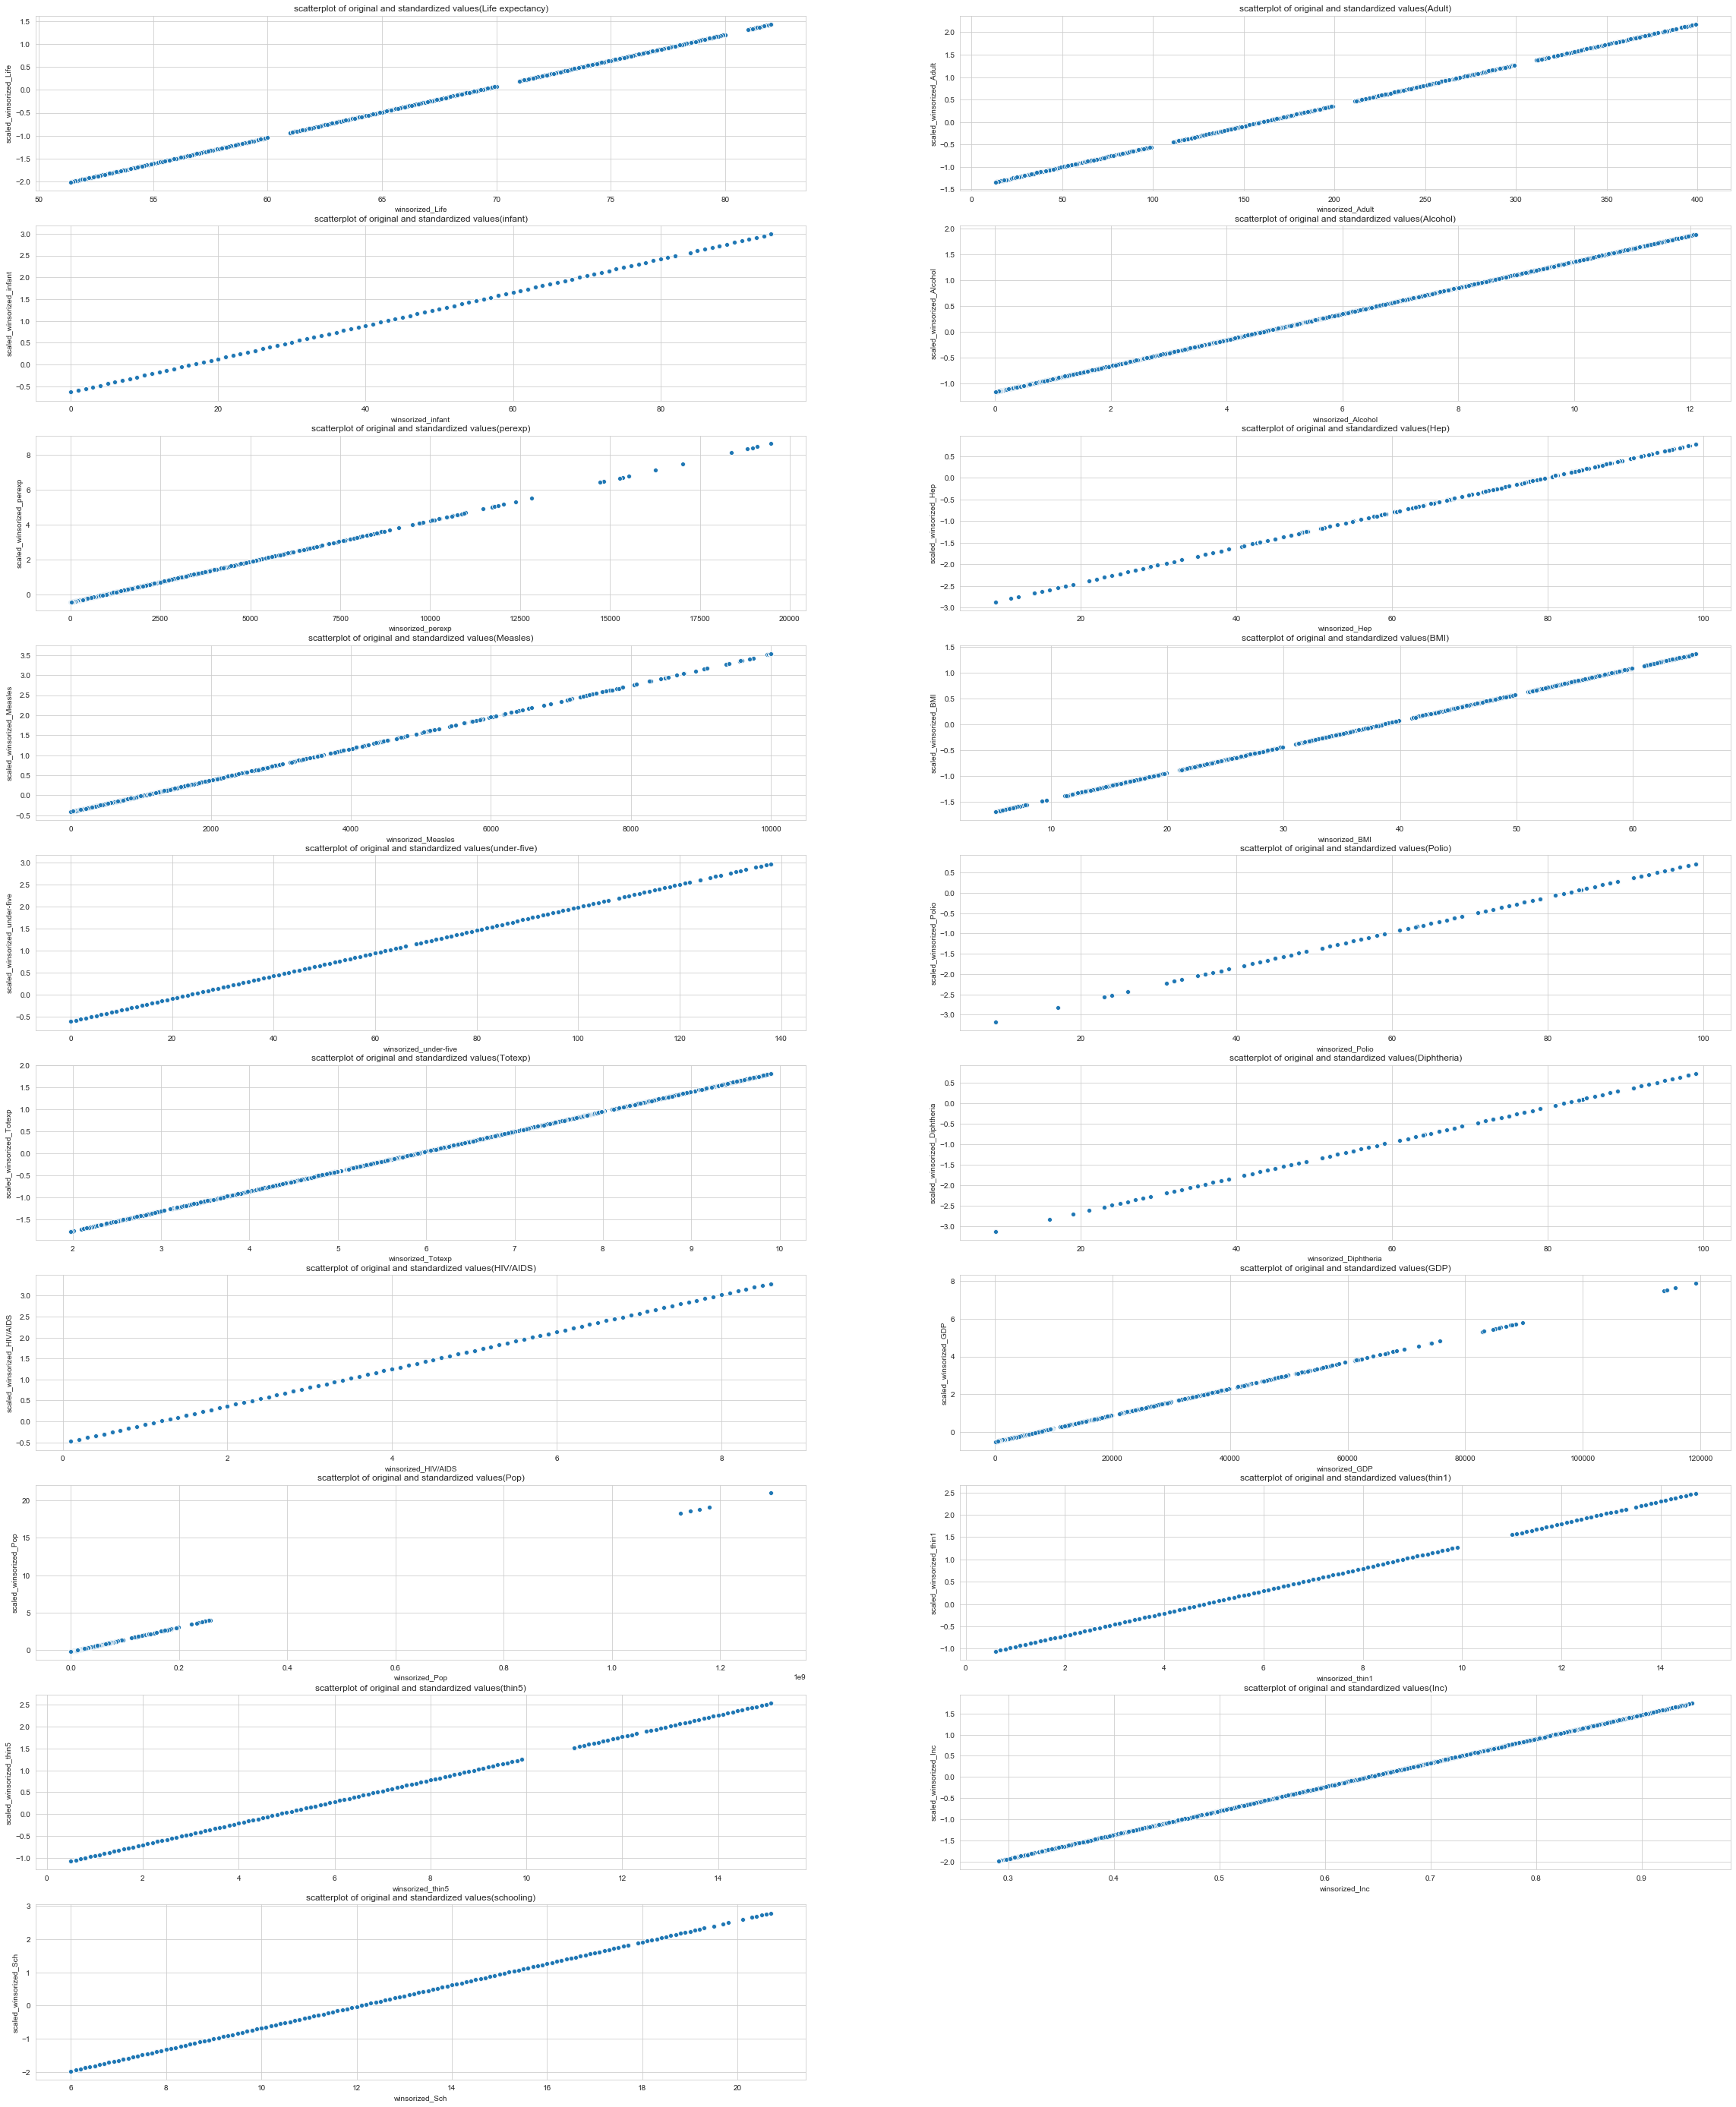

In [417]:
from sklearn.preprocessing import scale

# Standardizing the winsorized variables(rescaling)

life_expectancy_c["scaled_winsorized_Life"] = scale(life_expectancy_c["winsorized_Life"])
life_expectancy_c["scaled_winsorized_Adult"] = scale(life_expectancy_c["winsorized_Adult"])

life_expectancy_c["scaled_winsorized_infant"] =  scale(life_expectancy_c["winsorized_infant"])

life_expectancy_c["scaled_winsorized_Alcohol"] = scale(life_expectancy_c["winsorized_Alcohol"])

life_expectancy_c["scaled_winsorized_perexp"] = scale(life_expectancy_c["winsorized_perexp"])

life_expectancy_c["scaled_winsorized_Hep"] = scale(life_expectancy_c["winsorized_Hep"])

life_expectancy_c["scaled_winsorized_Measles"] = scale(life_expectancy_c["winsorized_Measles"])

life_expectancy_c["scaled_winsorized_BMI"]= scale(life_expectancy_c["winsorized_BMI"])

life_expectancy_c["scaled_winsorized_under-five"]= scale(life_expectancy_c["winsorized_under-five"])

life_expectancy_c["scaled_winsorized_Polio"]= scale(life_expectancy_c["winsorized_Polio"])

life_expectancy_c["scaled_winsorized_Totexp"]= scale(life_expectancy_c["winsorized_Totexp"])

life_expectancy_c["scaled_winsorized_Diphtheria"]= scale(life_expectancy_c["winsorized_Diphtheria"])

life_expectancy_c["scaled_winsorized_HIV/AIDS"]= scale(life_expectancy_c["winsorized_HIV/AIDS"])

life_expectancy_c["scaled_winsorized_GDP"]= scale(life_expectancy_c["winsorized_GDP"])

life_expectancy_c["scaled_winsorized_Pop"]= scale(life_expectancy_c["winsorized_Pop"])

life_expectancy_c["scaled_winsorized_thin1"]= scale(life_expectancy_c["winsorized_thin1"])

life_expectancy_c["scaled_winsorized_thin5"]= scale(life_expectancy_c["winsorized_thin5"])

life_expectancy_c["scaled_winsorized_Inc"]= scale(life_expectancy_c["winsorized_Inc"])

life_expectancy_c["scaled_winsorized_Sch"]= scale(life_expectancy_c["winsorized_Sch"])



plt.figure(figsize=(40,50))

# draw the scatter plot using seaborn for all the winsorized and scaled columns
plt.subplot(10,2,1)
sns.scatterplot(life_expectancy_c["winsorized_Life"], life_expectancy_c["scaled_winsorized_Life"])
plt.title("scatterplot of original and standardized values(Life expectancy)")

plt.subplot(10,2,2)
sns.scatterplot(life_expectancy_c["winsorized_Adult"], life_expectancy_c["scaled_winsorized_Adult"])
plt.title("scatterplot of original and standardized values(Adult)")

plt.subplot(10,2,3)
sns.scatterplot(life_expectancy_c["winsorized_infant"], life_expectancy_c["scaled_winsorized_infant"])
plt.title("scatterplot of original and standardized values(infant)")

plt.subplot(10,2,4)
sns.scatterplot(life_expectancy_c["winsorized_Alcohol"], life_expectancy_c["scaled_winsorized_Alcohol"])
plt.title("scatterplot of original and standardized values(Alcohol)")

plt.subplot(10,2,5)
sns.scatterplot(life_expectancy_c["winsorized_perexp"], life_expectancy_c["scaled_winsorized_perexp"])
plt.title("scatterplot of original and standardized values(perexp)")

plt.subplot(10,2,6)
sns.scatterplot(life_expectancy_c["winsorized_Hep"], life_expectancy_c["scaled_winsorized_Hep"])
plt.title("scatterplot of original and standardized values(Hep)")

plt.subplot(10,2,7)
sns.scatterplot(life_expectancy_c["winsorized_Measles"], life_expectancy_c["scaled_winsorized_Measles"])
plt.title("scatterplot of original and standardized values(Measles)")

plt.subplot(10,2,8)
sns.scatterplot(life_expectancy_c["winsorized_BMI"], life_expectancy_c["scaled_winsorized_BMI"])
plt.title("scatterplot of original and standardized values(BMI)")


plt.subplot(10,2,9)
sns.scatterplot(life_expectancy_c["winsorized_under-five"], life_expectancy_c["scaled_winsorized_under-five"])
plt.title("scatterplot of original and standardized values(under-five)")

plt.subplot(10,2,10)
sns.scatterplot(life_expectancy_c["winsorized_Polio"], life_expectancy_c["scaled_winsorized_Polio"])
plt.title("scatterplot of original and standardized values(Polio)")


plt.subplot(10,2,11)
sns.scatterplot(life_expectancy_c["winsorized_Totexp"], life_expectancy_c["scaled_winsorized_Totexp"])
plt.title("scatterplot of original and standardized values(Totexp)")


plt.subplot(10,2,12)
sns.scatterplot(life_expectancy_c["winsorized_Diphtheria"], life_expectancy_c["scaled_winsorized_Diphtheria"])
plt.title("scatterplot of original and standardized values(Diphtheria)")

plt.subplot(10,2,13)
sns.scatterplot(life_expectancy_c["winsorized_HIV/AIDS"], life_expectancy_c["scaled_winsorized_HIV/AIDS"])
plt.title("scatterplot of original and standardized values(HIV/AIDS)")

plt.subplot(10,2,14)
sns.scatterplot(life_expectancy_c["winsorized_GDP"], life_expectancy_c["scaled_winsorized_GDP"])
plt.title("scatterplot of original and standardized values(GDP)")


plt.subplot(10,2,15)
sns.scatterplot(life_expectancy_c["winsorized_Pop"], life_expectancy_c["scaled_winsorized_Pop"])
plt.title("scatterplot of original and standardized values(Pop)")


plt.subplot(10,2,16)
sns.scatterplot(life_expectancy_c["winsorized_thin1"], life_expectancy_c["scaled_winsorized_thin1"])
plt.title("scatterplot of original and standardized values(thin1)")


plt.subplot(10,2,17)
sns.scatterplot(life_expectancy_c["winsorized_thin5"], life_expectancy_c["scaled_winsorized_thin5"])
plt.title("scatterplot of original and standardized values(thin5)")


plt.subplot(10,2,18)
sns.scatterplot(life_expectancy_c["winsorized_Inc"], life_expectancy_c["scaled_winsorized_Inc"])
plt.title("scatterplot of original and standardized values(Inc)")

plt.subplot(10,2,19)
sns.scatterplot(life_expectancy_c["winsorized_Sch"], life_expectancy_c["scaled_winsorized_Sch"])
plt.title("scatterplot of original and standardized values(schooling)")


plt.show()


After, normalizing and standardizing winsorized data, now lets do PCA, and see higher corelation between new feature and life expectancy:

Till now, finding shows that, Income composition of resoures, Schooling is highly and positively corelated to life expectancy than others, whereas, Adult Mortality is negatively corelated to life expectancy.

That means more of the education, income is increasing life expectancy and mortality rate is decreasing life expectancy, which does make sense.


### Dimensionality reduction: PCA

Now, do the feaature engineering using dimension reduction(PCA):

lets try normalizing all data by droping all na

In [418]:
life_expectancy_c.dropna(inplace=True)

In [419]:
life_expectancy_c.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,scaled_winsorized_Polio,scaled_winsorized_Totexp,scaled_winsorized_Diphtheria,scaled_winsorized_HIV/AIDS,scaled_winsorized_GDP,scaled_winsorized_Pop,scaled_winsorized_thin1,scaled_winsorized_thin5,scaled_winsorized_Inc,scaled_winsorized_Sch
Year,1.000000,0.177657,-0.074374,-0.041393,-0.045391,0.077663,0.138700,-0.097629,0.105160,-0.046959,...,0.092933,0.055243,0.143153,-0.124214,0.107947,0.016396,-0.054136,-0.055056,0.216612,0.212791
Life expectancy,0.177657,1.000000,-0.662604,-0.162808,0.395776,0.417996,0.246137,-0.135319,0.594391,-0.189417,...,0.426442,0.229655,0.451347,-0.722733,0.445295,-0.011416,-0.517146,-0.508517,0.829553,0.766493
Adult Mortality,-0.074374,-0.662604,1.000000,0.042165,-0.183263,-0.246840,-0.100522,-0.005653,-0.370251,0.056828,...,-0.213670,-0.112366,-0.212969,0.580512,-0.259417,-0.021054,0.326070,0.331703,-0.485655,-0.419623
infant deaths,-0.041393,-0.162808,0.042165,1.000000,-0.103068,-0.090547,-0.215084,0.520328,-0.225732,0.996602,...,-0.153428,-0.158958,-0.157392,0.042190,-0.097856,0.555948,0.314316,0.317253,-0.165339,-0.206799
Alcohol,-0.045391,0.395776,-0.183263,-0.103068,1.000000,0.438051,0.098251,-0.030689,0.375714,-0.098159,...,0.239269,0.256847,0.237352,-0.067252,0.459544,-0.023625,-0.423563,-0.413126,0.592286,0.608031
percentage expenditure,0.077663,0.417996,-0.246840,-0.090547,0.438051,1.000000,0.013457,-0.069316,0.281938,-0.093205,...,0.165632,0.232013,0.171375,-0.162687,0.948796,-0.015526,-0.296818,-0.298232,0.464690,0.447674
Hepatitis B,0.138700,0.246137,-0.100522,-0.215084,0.098251,0.013457,1.000000,-0.130280,0.167290,-0.224863,...,0.470025,0.141267,0.583179,-0.187944,0.029962,-0.111173,-0.113179,-0.118304,0.228113,0.251757
Measles,-0.097629,-0.135319,-0.005653,0.520328,-0.030689,-0.069316,-0.130280,1.000000,-0.165920,0.527674,...,-0.111785,-0.117543,-0.117044,0.069163,-0.073373,0.266169,0.186870,0.182681,-0.132727,-0.145039
BMI,0.105160,0.594391,-0.370251,-0.225732,0.375714,0.281938,0.167290,-0.165920,1.000000,-0.235991,...,0.260934,0.255060,0.262961,-0.382943,0.304009,-0.067974,-0.588520,-0.597957,0.614347,0.603994
under-five deaths,-0.046959,-0.189417,0.056828,0.996602,-0.098159,-0.093205,-0.224863,0.527674,-0.235991,1.000000,...,-0.171306,-0.159336,-0.178349,0.065438,-0.101513,0.543566,0.323712,0.325253,-0.185564,-0.222929


In [420]:
#between highly positve corelation
X = life_expectancy_c[["Schooling", "Income composition of resources"]]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
life_expectancy_c["pca_1"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.90574115]


In [421]:
#between positve corelation
X1 = life_expectancy_c[["Alcohol", "percentage expenditure", "BMI", "Polio", "Diphtheria", "GDP"]]

X1 = StandardScaler().fit_transform(X1)

sklearn_pca = PCA(n_components=1)
life_expectancy_c["pca_2"] = sklearn_pca.fit_transform(X1)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.46174635]


In [422]:
#between negative corelation
X2 = life_expectancy_c[["Adult Mortality", "HIV/AIDS"]]

X2 = StandardScaler().fit_transform(X2)

sklearn_pca = PCA(n_components=1)
life_expectancy_c["pca_3"] = sklearn_pca.fit_transform(X2)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.76634766]


After replacing all the nan to 0, PCA worked, but Schooling and Income composition of resources % of corelation to life expectancy were dropped. 

In [423]:
life_expectancy_c[["pca_1","pca_2","pca_3", "Life expectancy","Schooling", "Income composition of resources",
                  "Adult Mortality", "infant deaths", "Alcohol", "percentage expenditure", 
                   "Hepatitis B", "Measles", "BMI", "under-five deaths", "Polio", "Total expenditure",
                   "Diphtheria", "HIV/AIDS", "GDP", "Population", "thinness  1-19 years", "thinness 5-9 years"]].corr()

,pca_1,pca_2,pca_3,Life expectancy,Schooling,Income composition of resources,Adult Mortality,infant deaths,Alcohol,percentage expenditure,...,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years
pca_1,1.000000,-0.718761,0.385739,-0.778006,-0.951704,-0.951704,0.434592,0.175579,-0.591489,-0.443339,...,-0.592956,0.194949,-0.414598,-0.241249,-0.447072,0.240770,-0.486763,0.010715,0.473995,0.456530
pca_2,-0.718761,1.000000,-0.308718,0.653332,0.705253,0.662843,-0.358000,-0.190341,0.687933,0.813036,...,0.580886,-0.200867,0.549269,0.307479,0.551821,-0.182511,0.832206,-0.041326,-0.467382,-0.465175
pca_3,0.385739,-0.308718,1.000000,-0.705234,-0.354277,-0.379943,0.875413,0.026293,-0.123328,-0.203022,...,-0.346660,0.041444,-0.199928,-0.040648,-0.205680,0.875413,-0.217142,-0.029751,0.267338,0.271987
Life expectancy,-0.778006,0.653332,-0.705234,1.000000,0.746619,0.734244,-0.662604,-0.162808,0.395776,0.417996,...,0.594391,-0.189417,0.425408,0.203689,0.449975,-0.572137,0.445425,-0.011420,-0.458721,-0.450215
Schooling,-0.951704,0.705253,-0.354277,0.746619,1.000000,0.811482,-0.408661,-0.194936,0.591569,0.430282,...,0.585756,-0.211838,0.410273,0.261679,0.432891,-0.211615,0.471767,-0.022453,-0.467009,-0.451321
Income composition of resources,-0.951704,0.662843,-0.379943,0.734244,0.811482,1.000000,-0.418546,-0.139262,0.534276,0.413573,...,0.542882,-0.159229,0.378877,0.197516,0.418070,-0.246668,0.454742,0.002057,-0.435197,-0.417641
Adult Mortality,0.434592,-0.358000,0.875413,-0.662604,-0.408661,-0.418546,1.000000,0.042165,-0.183263,-0.246840,...,-0.370251,0.056828,-0.212945,-0.097938,-0.212157,0.532695,-0.259500,-0.021050,0.277278,0.282890
infant deaths,0.175579,-0.190341,0.026293,-0.162808,-0.194936,-0.139262,0.042165,1.000000,-0.103068,-0.090547,...,-0.225732,0.996602,-0.152672,-0.148691,-0.156520,0.003869,-0.097887,0.555949,0.483646,0.489440
Alcohol,-0.591489,0.687933,-0.123328,0.395776,0.591569,0.534276,-0.183263,-0.103068,1.000000,0.438051,...,0.375714,-0.098159,0.238104,0.237493,0.236125,-0.032663,0.459611,-0.023624,-0.401590,-0.390655
percentage expenditure,-0.443339,0.813036,-0.203022,0.417996,0.430282,0.413573,-0.246840,-0.090547,0.438051,1.000000,...,0.281938,-0.093205,0.164929,0.222639,0.170647,-0.108617,0.948783,-0.015525,-0.271757,-0.271790


Observations:
1. pca_1 is negative to Life expectancy, maybe it is because of the higher corelation of more than 0.7 to schooling and income composition.
2. We can choose pca_2 for positive and pca_3 for negative corelation to life expectancy as they are highly corelated to Life expectancy which is the target.


### Feature Selection:
                        

#### Filter Selection: Using Pearson correlation :

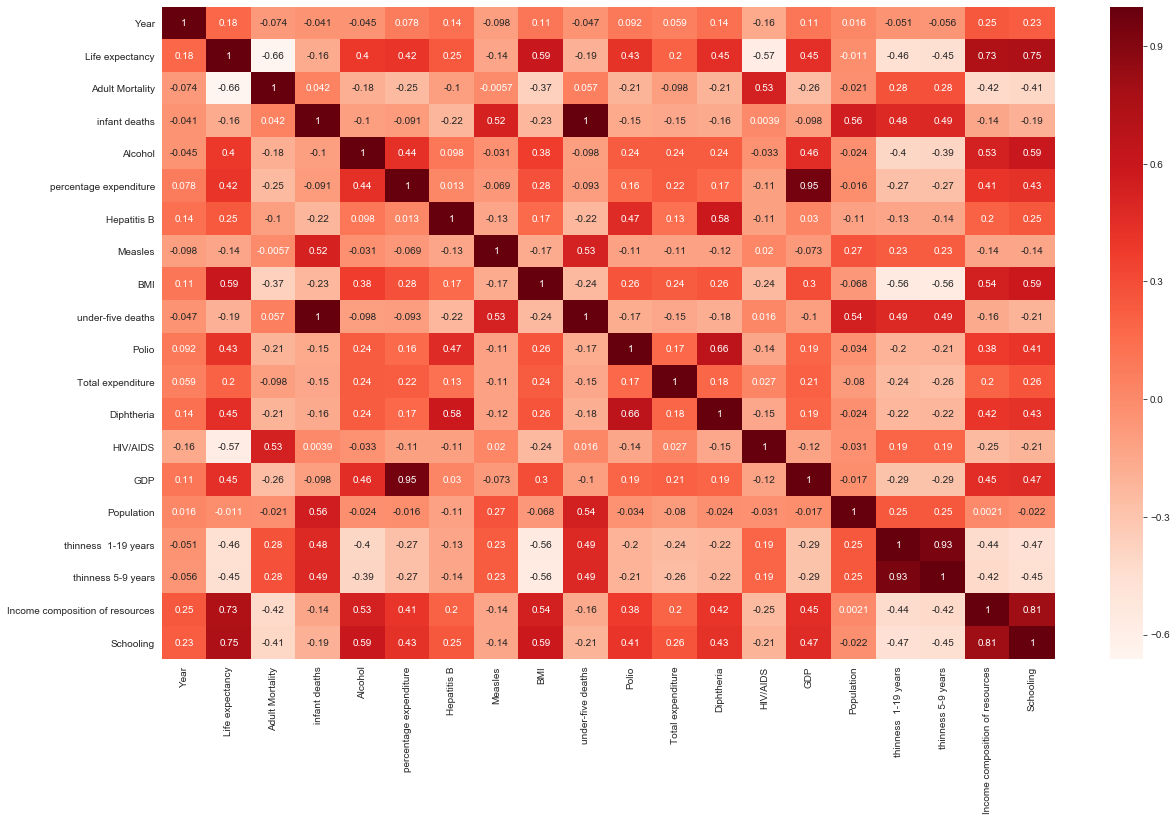

In [424]:
#Using Pearson Correlation
plt.figure(figsize=(20,12))
cor = life_expectancy_c.iloc[:, 0:22].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

From above, as we can see, Income composition of resources, Schooling and Adult Mortality is highly corelated, and also there is another feature, BMI which is higher than 0.5.

Lets do find relevant features that have corelation higher than 0.5:

In [425]:
#Correlation with output variable
cor_target = abs(cor["Life expectancy"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Life expectancy                    1.000000
Adult Mortality                    0.662604
BMI                                0.594391
HIV/AIDS                           0.572137
Income composition of resources    0.734244
Schooling                          0.746619
Name: Life expectancy, dtype: float64

From output we have five of different features they are highly correlated to the target(life expectancy), but also we need to see if they are highly correlated to eachother or not?

lets print corrleation between all of them:

In [426]:
print(life_expectancy_c[["Adult Mortality","BMI"]].corr())
print(life_expectancy_c[["BMI","HIV/AIDS"]].corr())
print(life_expectancy_c[["Adult Mortality","HIV/AIDS"]].corr())
print(life_expectancy_c[["Adult Mortality","Income composition of resources"]].corr())
print(life_expectancy_c[["Adult Mortality","Schooling"]].corr())
print(life_expectancy_c[["BMI","Income composition of resources"]].corr())
print(life_expectancy_c[["BMI","Schooling"]].corr())
print(life_expectancy_c[["HIV/AIDS","Income composition of resources"]].corr())
print(life_expectancy_c[["HIV/AIDS","Schooling"]].corr())
print(life_expectancy_c[["Schooling","Income composition of resources"]].corr())


                 Adult Mortality       BMI
Adult Mortality         1.000000 -0.370251
BMI                    -0.370251  1.000000
               BMI  HIV/AIDS
BMI       1.000000 -0.236691
HIV/AIDS -0.236691  1.000000
                 Adult Mortality  HIV/AIDS
Adult Mortality         1.000000  0.532695
HIV/AIDS                0.532695  1.000000
                                 Adult Mortality  \
Adult Mortality                         1.000000   
Income composition of resources        -0.418546   

                                 Income composition of resources  
Adult Mortality                                        -0.418546  
Income composition of resources                         1.000000  
                 Adult Mortality  Schooling
Adult Mortality         1.000000  -0.408661
Schooling              -0.408661   1.000000
                                      BMI  Income composition of resources
BMI                              1.000000                         0.542882
Income composit

As a result, we can see, Schooling and Income composition of resources are highly correlated by 0.8, and also Income composition is somehow correlated to BMI, so I will drop Income composition of resources. Here Schooling has higher correlation to the target than Income composition of resources.

Next, **Forward Selection:**
Lets do feature selection using forward selection:

**In forward passes**, the algorithm begins with no features and adds features 1-by-1, always adding the feature that results in the highest increase in predictive power and stopping at some predetermined threshold.


In [428]:
#initializing data and target
data = life_expectancy_c.iloc[:, 4:82] # data is all from column 4 to 82 includes all the rows
target = life_expectancy_c.iloc[:, 3]  #target is column 3 which is life expectancy

In [473]:
#importing all the sklearn libraries that is needed for further selection process
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

boston = load_boston()
X, y = boston.data, boston.target
lr = LinearRegression()

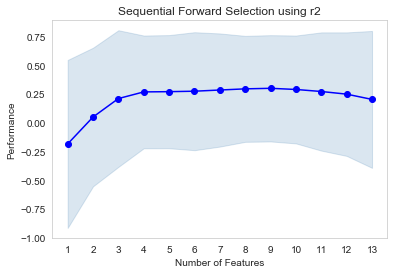


Forward Selection:
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)


In [535]:
#forward selection method using r2 scoring
sfs = SFS(lr, 
          k_features=13, 
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=10)

sfs = sfs.fit(X,y)

fig = plot_sfs(sfs.get_metric_dict())
plt.title('Sequential Forward Selection using r2')
plt.grid()
plt.show()
print('\nForward Selection:')
print(sfs.k_feature_idx_)




Observation: I selected 13 features and from the result, all these 13 features when added together, gives higher correlation to the target. We can see after feature 3 to 11 shows higher score.

Lets see what happens when I choose 5 features instead of 13:

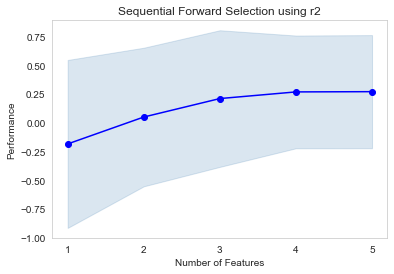


Forward Selection:
(3, 5, 10, 11, 12)


In [536]:
sfs1 = SFS(lr, 
          k_features=5, 
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=10)

sfs1 = sfs1.fit(X,y)

fig = plot_sfs(sfs1.get_metric_dict())
plt.title('Sequential Forward Selection using r2')
plt.grid()
plt.show()
print('\nForward Selection:')
print(sfs1.k_feature_idx_)

Obs:
Yes, I got 5 features which are 3, 5, 10, 11, and 12: percentage expenditure, Measles, Diptheria, HIV/AIDS, and GDP. Those features when added together have higher correlation to life expectancy, if only 5 features are selected. 

Lets use neative mean squared error to find lower error of features and get the selection of features.

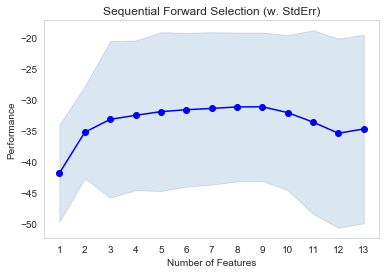


Forward Selection:
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)


In [433]:
sfs3 = SFS(lr, 
          k_features=13, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs3 = sfs3.fit(X,y)

fig = plot_sfs(sfs3.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
print('\nForward Selection:')
print(sfs3.k_feature_idx_)



Obs:
Negative mean squared error scoring is used here, and the result of feature selection is same when 13 features were selected.

Lets see with 5 features again using negative mean squared error:

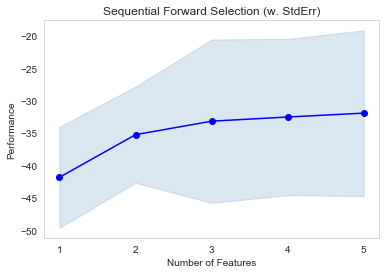


Forward Selection:
(4, 5, 7, 10, 12)


In [434]:
sfs4 = SFS(lr, 
          k_features=5, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs4 = sfs4.fit(X,y)

fig = plot_sfs(sfs4.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()
print('\nForward Selection:')
print(sfs4.k_feature_idx_)


Observation: 
Here 5 features are little different than the one I got when r2 scoring method was used. Here, I got, 4(Hepatitis B), 5(Measles), 7(under-five deaths), 10(Diphtheria), and 12(GDP).

Now, Lets move to another wrapper selection method which is: **Backward Selection**:

**In backward passes**, the algorithm begins with all features and drops features 1-by-1, always dropping the feature with the least predictive power and stopping at some predetermined threshold.

In [519]:
#backward selection method using r2 scoring
sbs = SFS(lr, 
          k_features=13, 
          forward=False, 
          floating=False, 
          scoring='r2',
          cv=10)

sbs = sbs.fit(X,y)

print('\nBackward Selection:')
print(sbs.k_feature_idx_)



Backward Selection:
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)


Obs:
Backward Selection, gives same result as forward selection when 13 features were selected: 
0(Adult Mortality), 1(infant deaths), 2(Alcohol), 3(percentage expenditure), 4(Hepatitis B), 5(Measles), 6(BMI), 7(under-five deaths), 8(Polio), 9(Total expenditure), 10(Diphtheria), 11(HIV/AIDS) and 12(GDP).


Bakcward selection using 5 features:

In [529]:
#backward selection method using r2 scoring
sbs1 = SFS(lr, 
          k_features=5, 
          forward=False, 
          floating=False, 
          scoring='r2',
          cv=10)

sbs1 = sbs1.fit(X,y)

print('\nBackward Selection:')
print(sbs1.k_feature_idx_)



Backward Selection:
(5, 7, 10, 11, 12)


Obs: 
Backward Selection using r2 and 5 features, gives:  5(Measles), 7(under-five deaths), 10(Diphtheria), 11(HIV/AIDS) and 12(GDP) features which might have higher correlation when added together.


Lets use negative mean squared error scoring to see any difference:

In [528]:
#backward selection method using neg_mean_squared_error scoring
sbs2 = SFS(lr, 
          k_features=13, 
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error',
          verbose = 2,
          cv=10)

sbs2 = sbs2.fit(X,y)

print('\nBackward Selection:')
print(sbs2.k_feature_idx_)



Backward Selection:
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)


Obs:
Backward Selection using neg_mean_squared_error scoring gives same result as forward selection when 13 features were selected too: 
0(Adult Mortality), 1(infant deaths), 2(Alcohol), 3(percentage expenditure), 4(Hepatitis B), 5(Measles), 6(BMI), 7(under-five deaths), 8(Polio), 9(Total expenditure), 10(Diphtheria), 11(HIV/AIDS) and 12(GDP).


In [522]:
#backward selection method using neg_mean_squared_error scoring
sbs3 = SFS(lr, 
          k_features=5, 
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sbs3 = sbs3.fit(X,y)

print('\nBackward Selection:')
print(sbs3.k_feature_idx_)


Backward Selection:
(4, 7, 8, 10, 12)


Obs:
Backward Selection using neg_mean_squared_error scoring gives: 4(Hepatitis B), 7(under-five deaths), 8(Polio), 10(Diphtheria), and 12(GDP).


Observations in Forward and Backward selection:

Oservations:
1. When 13 features were selected, results were same when using forward/backward selection with any scoring method, but when 5 features were selected, results were little different. 
2. 10 and 12 are in all the result, which means these two should added together with other which have low correlation to the target to get higher correlation to target.

Using **RFE(Recursive Feature Elimination):**

In [510]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
rfe = RFE(lr, 5)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [False False False  True  True  True False  True False False  True False
 False]
Feature Ranking: [4 6 5 1 1 1 9 1 3 7 1 8 2]


Obs:
From result:

No. 1 ranking 5 features are: feature id 3, 4, 5, 7, and 10.

Lets find out how many features are the optimum number to get higher score:

In [505]:
#no of features
nof_list=np.arange(1,82)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    lr = LinearRegression()
    rfe = RFE(lr,nof_list[n])
    X_rfe = rfe.fit_transform(X,y)
    lr.fit(X_rfe,y)
    score = lr.score(X_rfe,y)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 13
Score with 13 features: 0.740643


Obs:
From above, we can see that if 13 features are added, then it will give higher score of 0.74 which is highly correlated to our target life expectancy.


### Conclusion:

- First I clean the data by filling all the missing values with corresponding mean for each country. 

- And then I looked for the outliers which might interfere with the accuracy, but as the data was from different countries and the outliers might be okay because of the difference in currency and the way of living. Just to figure out if capping outliers changes any outcomes I used winsorization to minimize the outliers, but the result was somehow affected.
- Then I did data exploration using univariate and bivariate analysis, where I could see the correlation of the target which is life expectancy to other features.
- I used PCA for dimension reduction, where I used two of the most positively correlated features to make one(pca_1), used any higher than 0.4 to make another feature(pca_2), and highly negative two features to one(pca_3). pca would make better feature to use for modelling, because the correlation was higher than anyother features.
- And then I tried filter selection method to find relevant features which have correlation that is higher than 0.5, and found most correlated 5 features which I can use for further analysis.
- Just to make it more accurate and less noisy, I looked for any correlation between thos highly correlated to target features, and found that Income composition of resources and Schooling were highly correlated to each other, so I decided to drop Income composition of resources.
- Filter selection is so basic and only look for individual correlation to target, I decide to do wrapper selection method, both Forward and Backward selection.
  - From forward and backward selection I got few features name which I can use for modelling for further analysis. 
  - I got combination of different features when 5 features were selected, and got feature ids 0-13 when 13 features were selected. That means any combination in between 0-13 or specially looking at graph of sfs, I can choose any features in between 3-12 to get higher correlation to target.
  
- Using RFE(Recursive Feature Elimination), I got optimum value of k features = 13, which means using 13 features together I can get higher correlation score to target than any other combination of features.
- So for further training, modelling, testing, and prediction I will use, combination of 13 features, or 5 features, or pca_2/pca_3 or feature schooling or feature Adult Mortality, because these are the ones with higher correlation to the target feature which is life expectancy.
- Dropping all other features might be a  good idea before next step.

-At last, what I see during exploration, feature selection, life expectancy is affected by different reasons and features, but were highly affected by mortality rate, income sources, better education, deadly diseases, and better health, when combine lower scored features together we got higher correlation to life expectancy, that means many of the features were dependent to eachother and affecting life expectancy of people in that country. So any features from higher correlation to lower correlation with life expectancy might have some direct or indirect relation to increase or decrease life expectancy. 

-Next, I will use all these features to go through training, cross validaton, and testing to find better model, which can be used for prediction.

